In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

file_path = "/kaggle/input/final-solar-data/augmented_df_v_final.csv"
df = pd.read_csv(file_path)
print(df)



     Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0    1.0   9.00                  660.00                   308.15   
1    1.0   9.25                  684.22                   309.65   
2    1.0   9.50                  685.55                   311.60   
3    1.0   9.75                  809.85                   315.09   
4    1.0  10.00                  812.00                   315.15   
..   ...    ...                     ...                      ...   
143  4.0  17.00                  181.00                   316.15   
144  4.0  17.25                  164.64                   315.75   
145  4.0  17.50                  117.79                   313.94   
146  4.0  17.75                   94.39                   313.71   
147  4.0  18.00                    2.00                   312.95   

     Outer glass temperature  Basin water temperature  \
0                     306.15                   316.15   
1                     308.93                   316.19   
2           

In [2]:
df.columns

Index(['Day', 'Time', 'Solar irradiance(W/m2)', 'Inner glass temperature',
       'Outer glass temperature', 'Basin water temperature',
       'Fresh water production (ml)', 'Ti', 'Area (m2)', 'Ambient temperature',
       'Accumulated output (ml)', 'Mw (L)', 'mw(L/m2)', 'h_fg',
       'Thermal energy efficiency', 'Ex_out', 'Ex_in', 'Exergy_efficiency'],
      dtype='object')

# For Paper

In [3]:
dff = df[['Day', 'Time', 'Solar irradiance(W/m2)', 'Inner glass temperature',
          'Outer glass temperature', 'Basin water temperature', 'Ambient temperature', 'mw(L/m2)']]

In [4]:
dfff=df

In [5]:
# Rename columns
dfff = dfff.rename(columns={
    'mw(L/m2)': 'Accumulated Water (L/m2)',
    'h_fg': 'Latent heat of evaporization'
})

# Drop specified columns
dfff = dfff.drop(columns=['Area (m2)', 'Accumulated output (ml)', 'Mw (L)','Fresh water production (ml)'])

In [6]:
dfff.columns

Index(['Day', 'Time', 'Solar irradiance(W/m2)', 'Inner glass temperature',
       'Outer glass temperature', 'Basin water temperature', 'Ti',
       'Ambient temperature', 'Accumulated Water (L/m2)',
       'Latent heat of evaporization', 'Thermal energy efficiency', 'Ex_out',
       'Ex_in', 'Exergy_efficiency'],
      dtype='object')

# Final Dataset Description (To be Added finally)

In [7]:
dfff.describe(include='all').transpose()

count          mean           std           min  \
Day                           148.0  2.500000e+00      1.121830  1.000000e+00   
Time                          148.0  1.350000e+01      2.678333  9.000000e+00   
Solar irradiance(W/m2)        148.0  6.406095e+02    264.863627  2.000000e+00   
Inner glass temperature       148.0  3.185582e+02      6.348767  3.011500e+02   
Outer glass temperature       148.0  3.136653e+02      5.391518  2.971500e+02   
Basin water temperature       148.0  3.281988e+02      8.362481  3.081500e+02   
Ti                            148.0  3.233785e+02      7.131946  3.046500e+02   
Ambient temperature           148.0  3.128200e+02      5.216027  2.960500e+02   
Accumulated Water (L/m2)      148.0  1.138503e-01      0.094164  3.200000e-04   
Latent heat of evaporization  148.0  1.358401e+06  41901.034959  1.287884e+06   
Thermal energy efficiency     148.0  8.745666e-01      0.557548  3.700935e-02   
Ex_out                        148.0  8.266618e+03   8300.356777  1.234817e+01   
Ex_in                         148.0  1.489816e+02     61.538998  4.657734e-01   
Exergy_efficiency             148.0  4.427445e+01     37.080410  1.019717e+00   

                                       25%           50%           75%  \
Day                           1.750000e+00  2.500000e+00  3.250000e+00   
Time                          1.125000e+01  1.350000e+01  1.575000e+01   
Solar irradiance(W/m2)        5.062500e+02  7.006750e+02  8.577775e+02   
Inner glass temperature       3.140225e+02  3.194050e+02  3.241425e+02   
Outer glass temperature       3.101600e+02  3.138650e+02  3.171425e+02   
Basin water temperature       3.220875e+02  3.281500e+02  3.342200e+02   
Ti                            3.180138e+02  3.235350e+02  3.298925e+02   
Ambient temperature           3.098914e+02  3.131430e+02  3.161278e+02   
Accumulated Water (L/m2)      2.403000e-02  9.724000e-02  1.870200e-01   
Latent heat of evaporization  1.320026e+06  1.358044e+06  1.390322e+06   
Thermal energy efficiency     4.043035e-01  8.773228e-01  1.300704e+00   
Ex_out                        1.268300e+03  5.846426e+03  1.368380e+04   
Ex_in                         1.181401e+02  1.631406e+02  1.994719e+02   
Exergy_efficiency             1.554012e+01  3.610634e+01  6.697004e+01   

                                       max  
Day                           4.000000e+00  
Time                          1.800000e+01  
Solar irradiance(W/m2)        9.450000e+02  
Inner glass temperature       3.289500e+02  
Outer glass temperature       3.251500e+02  
Basin water temperature       3.441500e+02  
Ti                            3.351500e+02  
Ambient temperature           3.240500e+02  
Accumulated Water (L/m2)      3.160000e-01  
Latent heat of evaporization  1.465672e+06  
Thermal energy efficiency     2.096915e+00  
Ex_out                        3.205636e+04  
Ex_in                         2.195404e+02  
Exergy_efficiency             1.476698e+02

# Final Plot ( To be added finally)

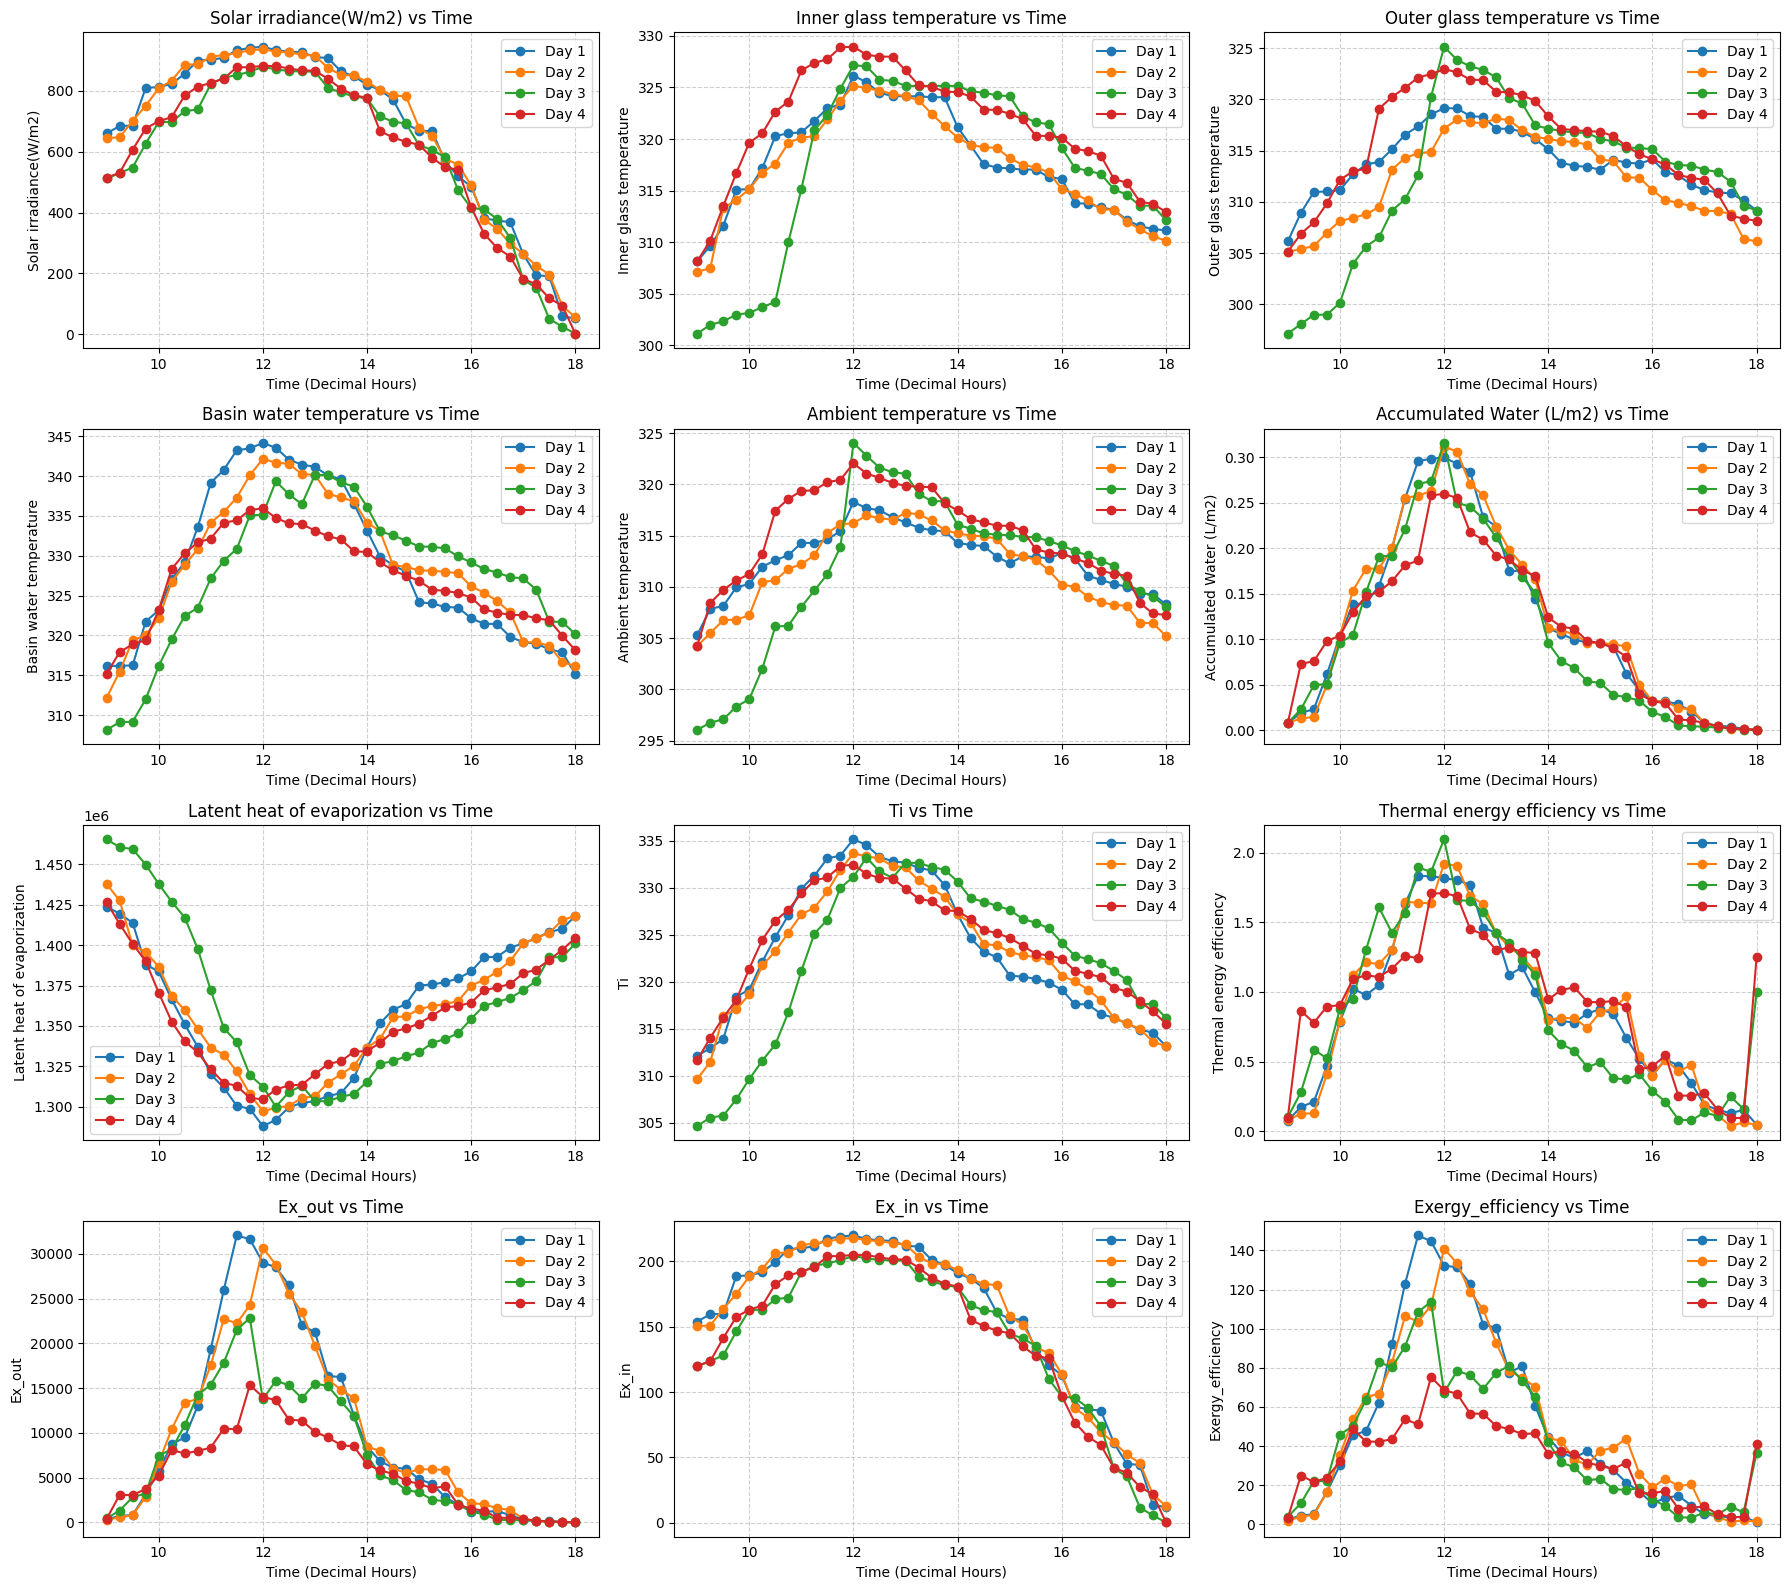

Plot saved as 'solar_still_features_analysis.png' and 'solar_still_features_analysis.pdf'


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assume dfff is your DataFrame and it is already loaded

# Features to plot (excluding 'Day' and 'Time' which are used for grouping and x-axis)
features = [
    'Solar irradiance(W/m2)', 'Inner glass temperature',
    'Outer glass temperature', 'Basin water temperature',
    'Ambient temperature', 'Accumulated Water (L/m2)',
    'Latent heat of evaporization', 'Ti', 'Thermal energy efficiency',
    'Ex_out', 'Ex_in', 'Exergy_efficiency'
]

n = len(features)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(18, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    for day in sorted(dfff['Day'].unique()):
        day_data = dfff[dfff['Day'] == day]
        plt.plot(day_data['Time'], day_data[feature], marker='o', linestyle='-', label=f'Day {int(day)}')
    plt.xlabel('Time (Decimal Hours)')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Time')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

plt.tight_layout()

# Save the plot as an image
plt.savefig('solar_still_features_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('solar_still_features_analysis.pdf', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

print("Plot saved as 'solar_still_features_analysis.png' and 'solar_still_features_analysis.pdf'")

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


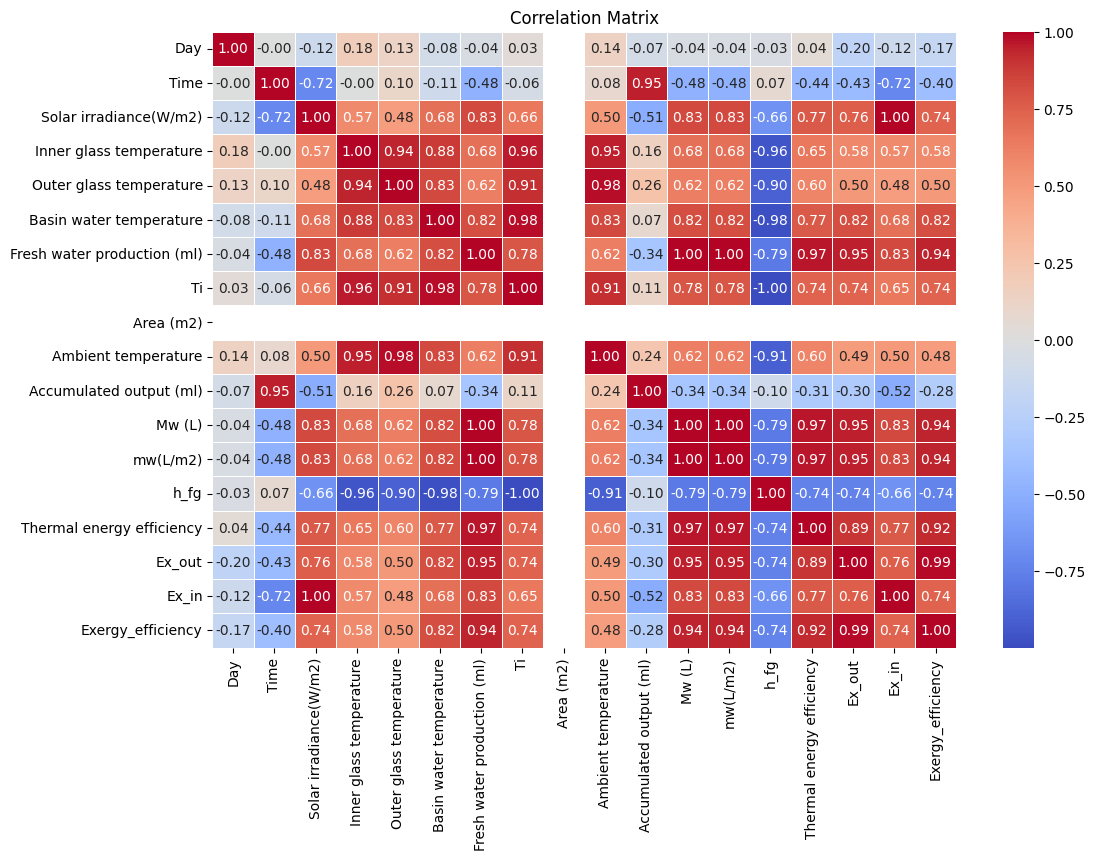

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
dfff.columns

Index(['Day', 'Time', 'Solar irradiance(W/m2)', 'Inner glass temperature',
       'Outer glass temperature', 'Basin water temperature', 'Ti',
       'Ambient temperature', 'Accumulated Water (L/m2)',
       'Latent heat of evaporization', 'Thermal energy efficiency', 'Ex_out',
       'Ex_in', 'Exergy_efficiency'],
      dtype='object')

# Final plot ( To be added finally)

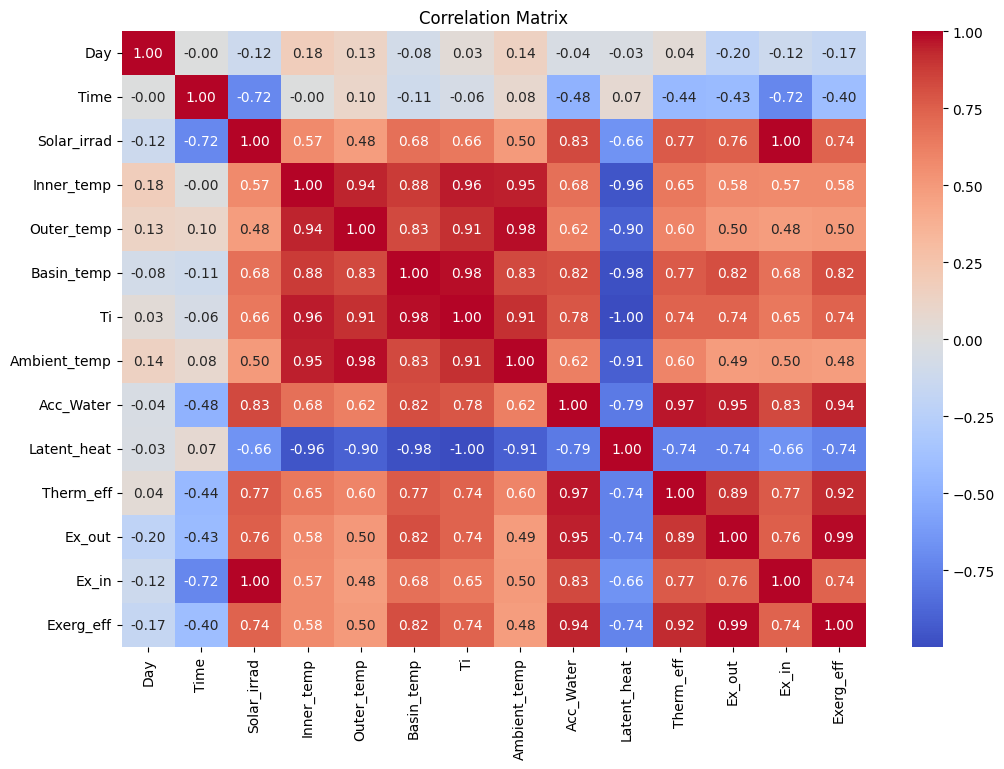

Plot saved as 'correlation_matrix_short_names.png' and 'correlation_matrix_short_names.pdf'


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Load your dataframe (replace this with your actual loading code)
# dfff = pd.read_csv('your_data.csv')

# Short names dictionary
short_names = {
    'Day': 'Day',
    'Time': 'Time',
    'Solar irradiance(W/m2)': 'Solar_irrad',
    'Inner glass temperature': 'Inner_temp',
    'Outer glass temperature': 'Outer_temp',
    'Basin water temperature': 'Basin_temp',
    'Ti': 'Ti',
    'Ambient temperature': 'Ambient_temp',
    'Accumulated Water (L/m2)': 'Acc_Water',
    'Thermal energy efficiency': 'Therm_eff',
    'Ex_out': 'Ex_out',
    'Ex_in': 'Ex_in',
    'Exergy_efficiency': 'Exerg_eff',
    'Latent heat of evaporization': 'Latent_heat'
}

# Strip column names and rename for robustness
dffff = dfff.rename(columns={col: short_names.get(col.strip(), col) for col in dfff.columns})

plt.figure(figsize=(12, 8))
sns.heatmap(dffff.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")

# Save the plot as PNG and PDF
plt.savefig('correlation_matrix_short_names.png', dpi=300, bbox_inches='tight')
plt.savefig('correlation_matrix_short_names.pdf', dpi=300, bbox_inches='tight')

plt.show()

print("Plot saved as 'correlation_matrix_short_names.png' and 'correlation_matrix_short_names.pdf'")

In [12]:
features1 = [
    'mw(L/m2)','h_fg','Solar irradiance(W/m2)'
]

In [13]:
df['Temp_Dif'] = df['Outer glass temperature'] - df['Inner glass temperature']

df['mul'] = (df['Basin water temperature']* df['Time'])

In [14]:
df = df.rename(columns={
    'Temp_Dif': 'OGT-IGT',
    'mul': 'BWT*Time'
})

In [15]:
df.columns

Index(['Day', 'Time', 'Solar irradiance(W/m2)', 'Inner glass temperature',
       'Outer glass temperature', 'Basin water temperature',
       'Fresh water production (ml)', 'Ti', 'Area (m2)', 'Ambient temperature',
       'Accumulated output (ml)', 'Mw (L)', 'mw(L/m2)', 'h_fg',
       'Thermal energy efficiency', 'Ex_out', 'Ex_in', 'Exergy_efficiency',
       'OGT-IGT', 'BWT*Time'],
      dtype='object')

# Water yeild prediction uisng ensemble Log Stacking

In [16]:
dfff.columns

Index(['Day', 'Time', 'Solar irradiance(W/m2)', 'Inner glass temperature',
       'Outer glass temperature', 'Basin water temperature', 'Ti',
       'Ambient temperature', 'Accumulated Water (L/m2)',
       'Latent heat of evaporization', 'Thermal energy efficiency', 'Ex_out',
       'Ex_in', 'Exergy_efficiency'],
      dtype='object')

In [17]:
dfff['OGT-IGT'] = dfff['Outer glass temperature'] - dfff['Inner glass temperature']

dfff['BWT*Time'] = (dfff['Basin water temperature']* dfff['Time'])

In [18]:
dfff.columns

Index(['Day', 'Time', 'Solar irradiance(W/m2)', 'Inner glass temperature',
       'Outer glass temperature', 'Basin water temperature', 'Ti',
       'Ambient temperature', 'Accumulated Water (L/m2)',
       'Latent heat of evaporization', 'Thermal energy efficiency', 'Ex_out',
       'Ex_in', 'Exergy_efficiency', 'OGT-IGT', 'BWT*Time'],
      dtype='object')

# To be added finally 2

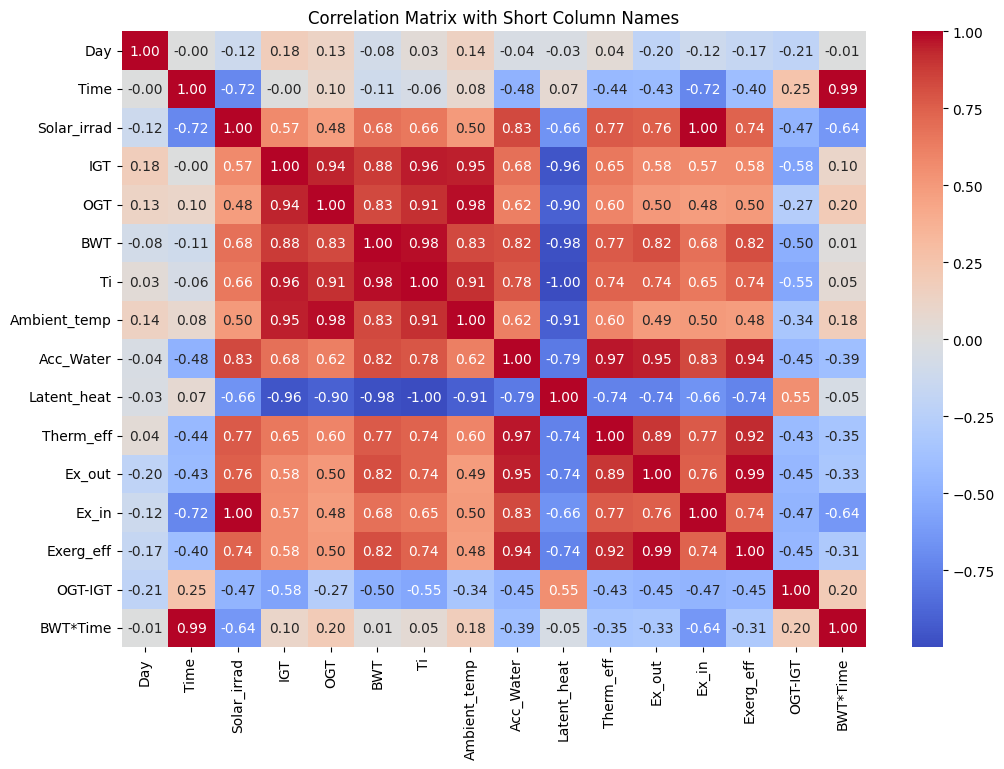

In [19]:
short_names = {
    'Day': 'Day',
    'Time': 'Time',
    'Solar irradiance(W/m2)': 'Solar_irrad',
    'Inner glass temperature': 'IGT',
    'Outer glass temperature': 'OGT',
    'Basin water temperature': 'BWT',
    'Ti': 'Ti',
    'Ambient temperature': 'Ambient_temp',
    'Accumulated Water (L/m2)': 'Acc_Water',
    'Thermal energy efficiency': 'Therm_eff',
    'Ex_out': 'Ex_out',
    'Ex_in': 'Ex_in',
    'Exergy_efficiency': 'Exerg_eff',
    'Latent heat of evaporization': 'Latent_heat'
}

# Strip column names before renaming for robustness
dfffff = dfff.rename(columns={col: short_names.get(col.strip(), col) for col in dfff.columns})

# Plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(dfffff.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix with Short Column Names")
plt.show()

# Acumulated Water Prediction


--- Train Set Metrics (Log-Stacking) ---
MAE: 0.0075
R²: 0.9830
RMSE: 0.0121
COV: 0.1062
EC: 0.9830
OI: 0.9956
MAPE: 0.1086
CRM: 0.0251
MRE: -0.0105
CC: 0.9921
COD: 0.9842
OI_MP: 0.9956

--- Test Set Metrics (Log-Stacking) ---
MAE: 0.0096
R²: 0.9749
RMSE: 0.0154
COV: 0.1372
EC: 0.9749
OI: 0.9936
MAPE: 0.2946
CRM: 0.0504
MRE: -0.0691
CC: 0.9891
COD: 0.9783
OI_MP: 0.9936


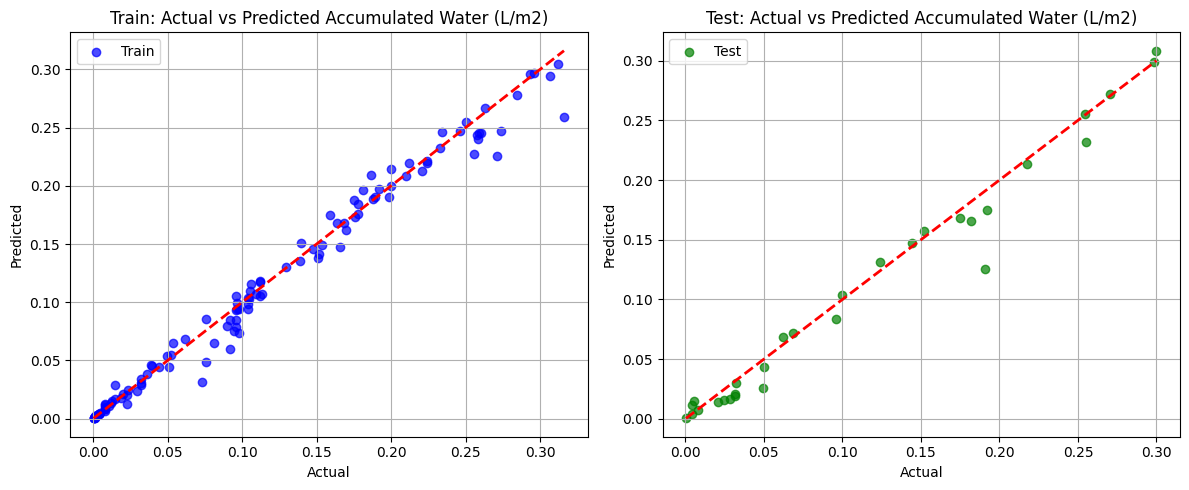

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Ex_in', 'OGT-IGT', 'BWT*Time']
target = 'Accumulated Water (L/m2)'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

y_pred_train_log = (
    0.5 * pred_svr_train +
    0.2 * pred_rf_train +
    0.2 * pred_xgb_train +
    0.1 * pred_mlp_train
)

y_pred_test_log = (
    0.5 * pred_svr_test +
    0.2 * pred_rf_test +
    0.2 * pred_xgb_test +
    0.1 * pred_mlp_test
)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Accumulated Water (L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Accumulated Water (L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Final Ensemble approach for Water prediction


--- Train Set Metrics (Log-Stacking) ---
MAE: 0.0075
R²: 0.9830
RMSE: 0.0121
COV: 0.1062
EC: 0.9830
OI: 0.9956
MAPE: 0.1086
CRM: 0.0251
MRE: -0.0105
CC: 0.9921
COD: 0.9842
OI_MP: 0.9956

--- Test Set Metrics (Log-Stacking) ---
MAE: 0.0096
R²: 0.9749
RMSE: 0.0154
COV: 0.1372
EC: 0.9749
OI: 0.9936
MAPE: 0.2946
CRM: 0.0504
MRE: -0.0691
CC: 0.9891
COD: 0.9783
OI_MP: 0.9936


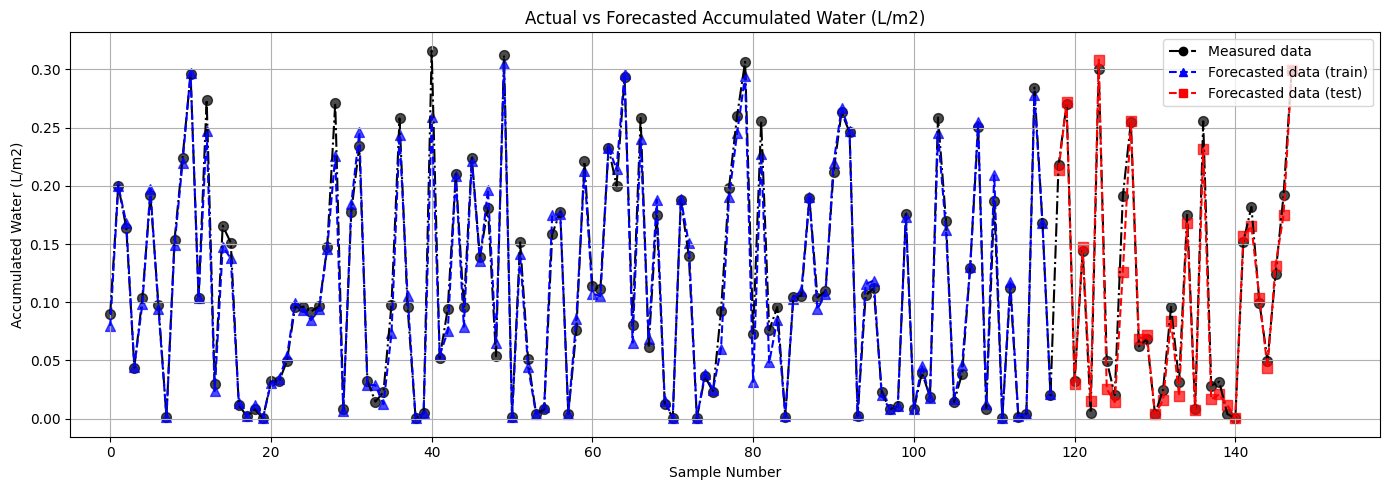

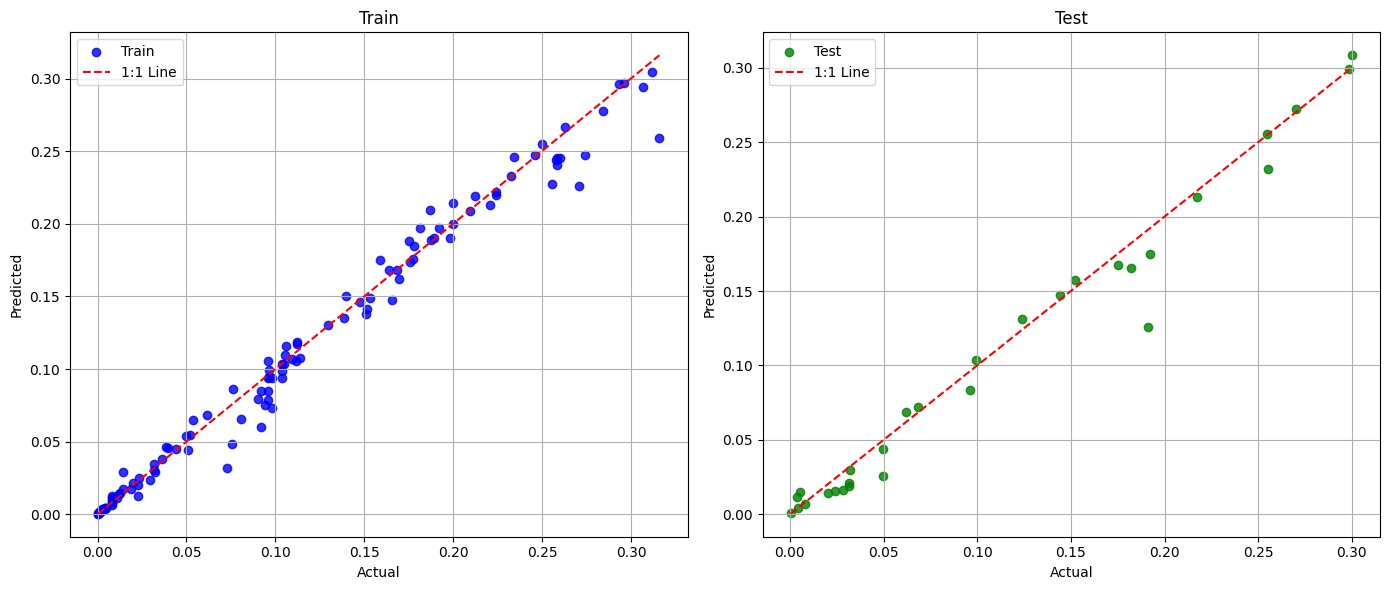

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# --- Assume dfff is your DataFrame (already loaded and cleaned) ---
# For demonstration, here's an example dummy DataFrame. Comment this out if you already have dfff.
# dfff = pd.DataFrame({
#     'Solar irradiance(W/m2)': np.random.uniform(200, 1000, 120),
#     'Outer glass temperature': np.random.uniform(20, 80, 120),
#     'Inner glass temperature': np.random.uniform(20, 80, 120),
#     'Basin water temperature': np.random.uniform(20, 80, 120),
#     'Ti': np.random.uniform(0.5, 3.5, 120),
#     'Ex_in': np.random.uniform(1, 20, 120),
#     'OGT-IGT': np.random.uniform(0.1, 10, 120),
#     'BWT*Time': np.random.uniform(0.1, 100, 120),
#     'Accumulated Water (L/m2)': np.random.uniform(0.1, 5, 120)
# })

df2 = dfff.copy()

features = [
    'Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
    'Basin water temperature', 'Ti', 'Ex_in', 'OGT-IGT', 'BWT*Time'
]
target = 'Accumulated Water (L/m2)'

# Log transform (replace non-positive values)
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

y_pred_train_log = (
    0.5 * pred_svr_train +
    0.2 * pred_rf_train +
    0.2 * pred_xgb_train +
    0.1 * pred_mlp_train
)
y_pred_test_log = (
    0.5 * pred_svr_test +
    0.2 * pred_rf_test +
    0.2 * pred_xgb_test +
    0.1 * pred_mlp_test
)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

# ---- Actual vs Predicted Series Plot with markers, expanded x-axis, and legend with symbols ----
actual = np.concatenate([y_train_actual, y_test_actual])
predicted = np.concatenate([y_pred_train, y_pred_test])
x = np.arange(len(actual))
split_idx = len(y_train_actual)

plt.figure(figsize=(14, 5))
line1, = plt.plot(x, actual, 'k-.', label='Measured data')
points1 = plt.scatter(x, actual, color='black', marker='o', s=50, alpha=0.7, label='Measured data (o)')
line2, = plt.plot(x[:split_idx], predicted[:split_idx], 'b--', label='Forecasted data (train)')
points2 = plt.scatter(x[:split_idx], predicted[:split_idx], color='blue', marker='^', s=50, alpha=0.7, label='Forecasted data (train, ^)')
line3, = plt.plot(x[split_idx:], predicted[split_idx:], 'r--', label='Forecasted data (test)')
points3 = plt.scatter(x[split_idx:], predicted[split_idx:], color='red', marker='s', s=50, alpha=0.7, label='Forecasted data (test, s)')

plt.xlabel('Sample Number')
plt.ylabel('Accumulated Water (L/m2)')
plt.title('Actual vs Forecasted Accumulated Water (L/m2)')
plt.grid(True)
plt.tight_layout()
plt.xlim(-5, len(actual)+10)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='k', linestyle='-.', marker='o', label='Measured data'),
    Line2D([0], [0], color='b', linestyle='--', marker='^', label='Forecasted data (train)'),
    Line2D([0], [0], color='r', linestyle='--', marker='s', label='Forecasted data (test)')
]
plt.legend(handles=legend_elements, loc='best')
plt.show()

# ---- Actual vs Predicted Scatter Plots for Train and Test ----
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Train set
axs[0].scatter(y_train_actual, y_pred_train, color='blue', label='Train', alpha=0.8)
axs[0].plot([min(y_train_actual), max(y_train_actual)],
            [min(y_train_actual), max(y_train_actual)],
            'r--', label='1:1 Line')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Train')
axs[0].legend()
axs[0].grid(True)

# Test set
axs[1].scatter(y_test_actual, y_pred_test, color='green', label='Test', alpha=0.8)
axs[1].plot([min(y_test_actual), max(y_test_actual)],
            [min(y_test_actual), max(y_test_actual)],
            'r--', label='1:1 Line')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Test')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [22]:
dfff.columns

Index(['Day', 'Time', 'Solar irradiance(W/m2)', 'Inner glass temperature',
       'Outer glass temperature', 'Basin water temperature', 'Ti',
       'Ambient temperature', 'Accumulated Water (L/m2)',
       'Latent heat of evaporization', 'Thermal energy efficiency', 'Ex_out',
       'Ex_in', 'Exergy_efficiency', 'OGT-IGT', 'BWT*Time'],
      dtype='object')


--- Train Set Metrics (Log-Stacking) ---
MAE: 0.0075
R²: 0.9830
RMSE: 0.0121
COV: 0.1062
EC: 0.9830
OI: 0.9956
MAPE: 0.1086
CRM: 0.0251
MRE: -0.0105
CC: 0.9921
COD: 0.9842
OI_MP: 0.9956

--- Test Set Metrics (Log-Stacking) ---
MAE: 0.0096
R²: 0.9749
RMSE: 0.0154
COV: 0.1372
EC: 0.9749
OI: 0.9936
MAPE: 0.2946
CRM: 0.0504
MRE: -0.0691
CC: 0.9891
COD: 0.9783
OI_MP: 0.9936

Maximum predicted value: 0.3083
Maximum experimental (actual) value: 0.3160


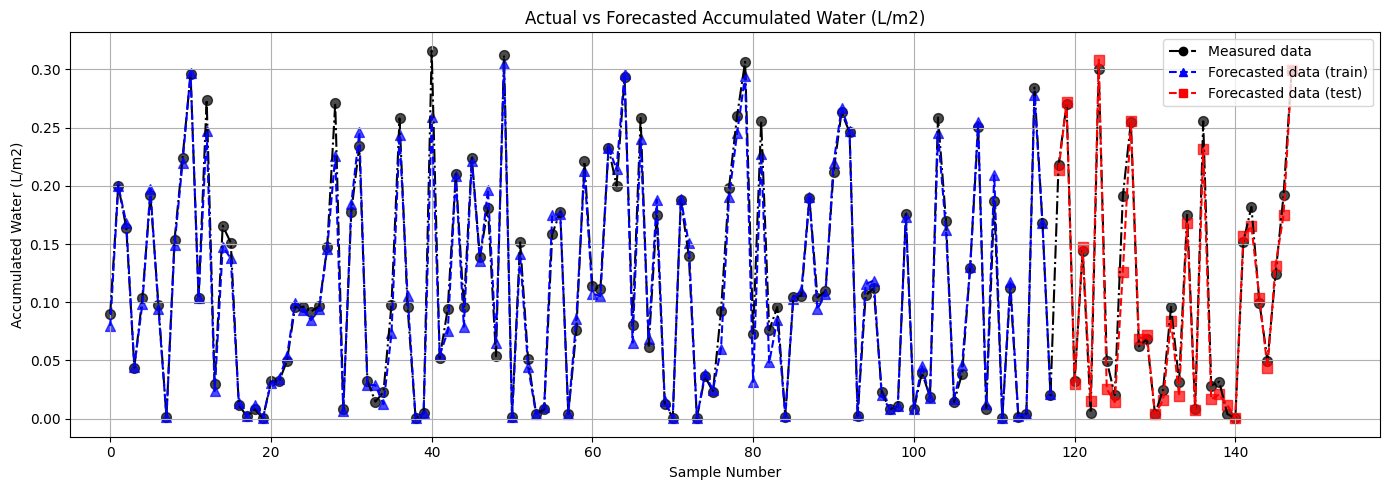

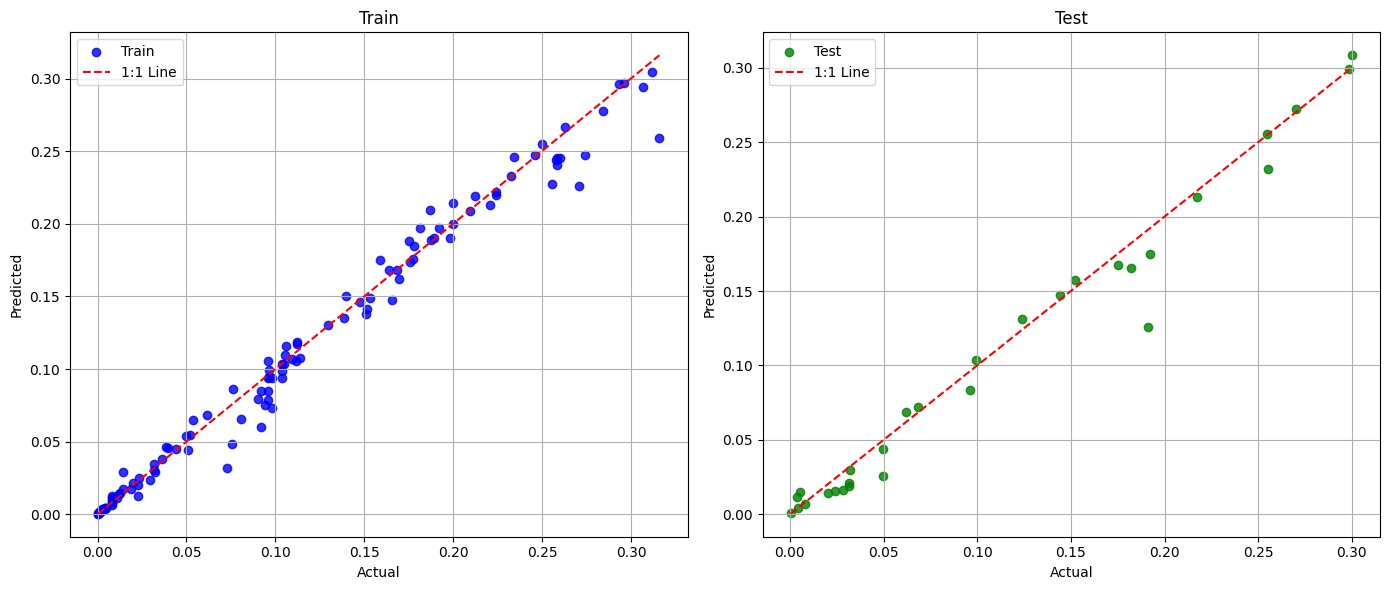

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# --- Assume dfff is your DataFrame (already loaded and cleaned) ---
# For demonstration, here's an example dummy DataFrame. Comment this out if you already have dfff.
# dfff = pd.DataFrame({
#     'Solar irradiance(W/m2)': np.random.uniform(200, 1000, 120),
#     'Outer glass temperature': np.random.uniform(20, 80, 120),
#     'Inner glass temperature': np.random.uniform(20, 80, 120),
#     'Basin water temperature': np.random.uniform(20, 80, 120),
#     'Ti': np.random.uniform(0.5, 3.5, 120),
#     'Ex_in': np.random.uniform(1, 20, 120),
#     'OGT-IGT': np.random.uniform(0.1, 10, 120),
#     'BWT*Time': np.random.uniform(0.1, 100, 120),
#     'Accumulated Water (L/m2)': np.random.uniform(0.1, 5, 120)
# })

df2 = dfff.copy()

features = [
    'Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
    'Basin water temperature', 'Ti', 'Ex_in', 'OGT-IGT', 'BWT*Time'
]
target = 'Accumulated Water (L/m2)'

# Log transform (replace non-positive values)
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

y_pred_train_log = (
    0.5 * pred_svr_train +
    0.2 * pred_rf_train +
    0.2 * pred_xgb_train +
    0.1 * pred_mlp_train
)
y_pred_test_log = (
    0.5 * pred_svr_test +
    0.2 * pred_rf_test +
    0.2 * pred_xgb_test +
    0.1 * pred_mlp_test
)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

# ---- Find and print maximum predicted and experimental (actual) values ----
all_predicted = np.concatenate([y_pred_train, y_pred_test])
all_actual = np.concatenate([y_train_actual, y_test_actual])
max_predicted = np.max(all_predicted)
max_actual = np.max(all_actual)
print(f"\nMaximum predicted value: {max_predicted:.4f}")
print(f"Maximum experimental (actual) value: {max_actual:.4f}")

# ---- Actual vs Predicted Series Plot with markers, expanded x-axis, and legend with symbols ----
x = np.arange(len(all_actual))
split_idx = len(y_train_actual)

plt.figure(figsize=(14, 5))
line1, = plt.plot(x, all_actual, 'k-.', label='Measured data')
points1 = plt.scatter(x, all_actual, color='black', marker='o', s=50, alpha=0.7, label='Measured data (o)')
line2, = plt.plot(x[:split_idx], all_predicted[:split_idx], 'b--', label='Forecasted data (train)')
points2 = plt.scatter(x[:split_idx], all_predicted[:split_idx], color='blue', marker='^', s=50, alpha=0.7, label='Forecasted data (train, ^)')
line3, = plt.plot(x[split_idx:], all_predicted[split_idx:], 'r--', label='Forecasted data (test)')
points3 = plt.scatter(x[split_idx:], all_predicted[split_idx:], color='red', marker='s', s=50, alpha=0.7, label='Forecasted data (test, s)')

plt.xlabel('Sample Number')
plt.ylabel('Accumulated Water (L/m2)')
plt.title('Actual vs Forecasted Accumulated Water (L/m2)')
plt.grid(True)
plt.tight_layout()
plt.xlim(-5, len(all_actual)+10)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='k', linestyle='-.', marker='o', label='Measured data'),
    Line2D([0], [0], color='b', linestyle='--', marker='^', label='Forecasted data (train)'),
    Line2D([0], [0], color='r', linestyle='--', marker='s', label='Forecasted data (test)')
]
plt.legend(handles=legend_elements, loc='best')
plt.show()

# ---- Actual vs Predicted Scatter Plots for Train and Test ----
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Train set
axs[0].scatter(y_train_actual, y_pred_train, color='blue', label='Train', alpha=0.8)
axs[0].plot([min(y_train_actual), max(y_train_actual)],
            [min(y_train_actual), max(y_train_actual)],
            'r--', label='1:1 Line')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Train')
axs[0].legend()
axs[0].grid(True)

# Test set
axs[1].scatter(y_test_actual, y_pred_test, color='green', label='Test', alpha=0.8)
axs[1].plot([min(y_test_actual), max(y_test_actual)],
            [min(y_test_actual), max(y_test_actual)],
            'r--', label='1:1 Line')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Test')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

Day 1.0: Experimental Water_P(L/m2) = 4.3713, Predicted Water_P(L/m2) = 4.4264
Day 2.0: Experimental Water_P(L/m2) = 4.4735, Predicted Water_P(L/m2) = 4.2802
Day 3.0: Experimental Water_P(L/m2) = 3.9051, Predicted Water_P(L/m2) = 3.6940
Day 4.0: Experimental Water_P(L/m2) = 4.1000, Predicted Water_P(L/m2) = 3.9403

--- Train Set Metrics (Log-Stacking) ---
MAE: 0.0075
R²: 0.9830
RMSE: 0.0121
COV: 0.1062
EC: 0.9830
OI: 0.9956
MAPE: 0.1086
CRM: 0.0251
MRE: -0.0105
CC: 0.9921
COD: 0.9842
OI_MP: 0.9956

--- Test Set Metrics (Log-Stacking) ---
MAE: 0.0096
R²: 0.9749
RMSE: 0.0154
COV: 0.1372
EC: 0.9749
OI: 0.9936
MAPE: 0.2946
CRM: 0.0504
MRE: -0.0691
CC: 0.9891
COD: 0.9783
OI_MP: 0.9936

Maximum predicted value: 0.3083
Maximum experimental (actual) value: 0.3160


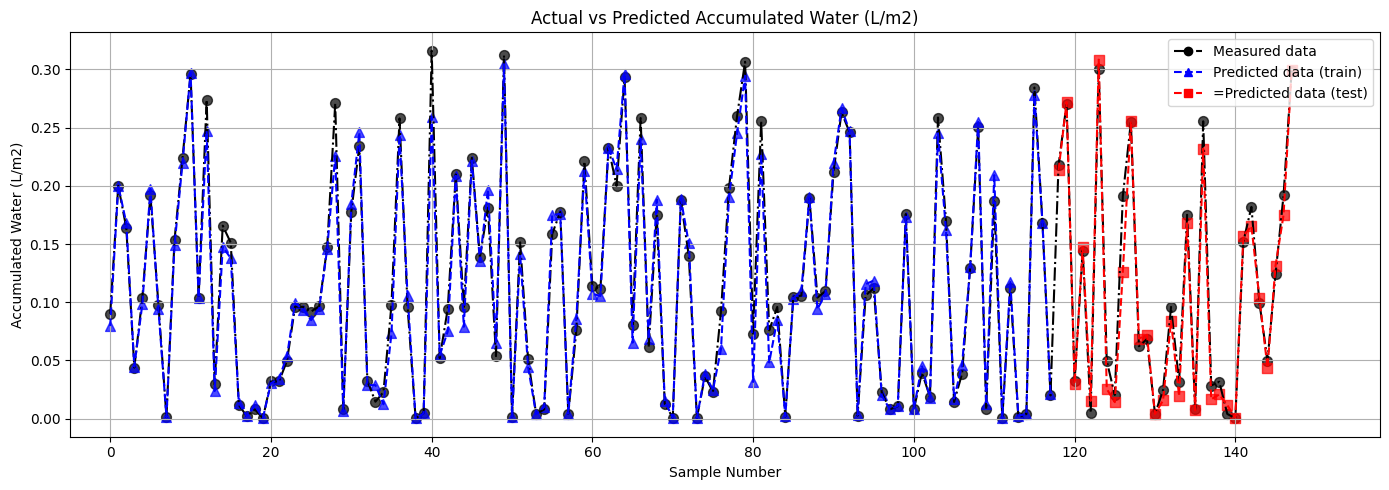

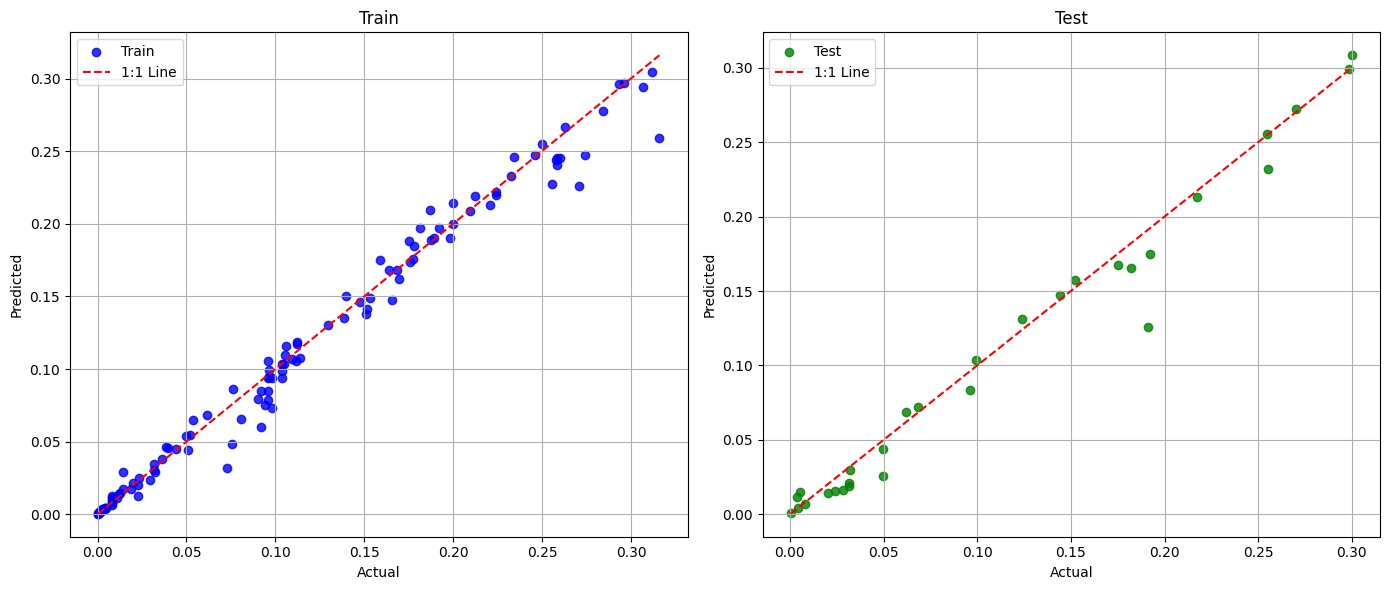

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# --- Assume dfff is your DataFrame (already loaded and cleaned) ---
# For demonstration, here's an example dummy DataFrame. Comment this out if you already have dfff.
# dfff = pd.DataFrame({
#     'Day': np.repeat(np.arange(1, 7), 20),
#     'Time': np.tile(np.arange(20), 6),
#     'Solar irradiance(W/m2)': np.random.uniform(200, 1000, 120),
#     'Outer glass temperature': np.random.uniform(20, 80, 120),
#     'Inner glass temperature': np.random.uniform(20, 80, 120),
#     'Basin water temperature': np.random.uniform(20, 80, 120),
#     'Ti': np.random.uniform(0.5, 3.5, 120),
#     'Ex_in': np.random.uniform(1, 20, 120),
#     'OGT-IGT': np.random.uniform(0.1, 10, 120),
#     'BWT*Time': np.random.uniform(0.1, 100, 120),
#     'Accumulated Water (L/m2)': np.random.uniform(0.1, 5, 120)
# })

df2 = dfff.copy()

features = [
    'Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
    'Basin water temperature', 'Ti', 'Ex_in', 'OGT-IGT', 'BWT*Time'
]
target = 'Accumulated Water (L/m2)'

# Log transform (replace non-positive values)
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

y_pred_train_log = (
    0.5 * pred_svr_train +
    0.2 * pred_rf_train +
    0.2 * pred_xgb_train +
    0.1 * pred_mlp_train
)
y_pred_test_log = (
    0.5 * pred_svr_test +
    0.2 * pred_rf_test +
    0.2 * pred_xgb_test +
    0.1 * pred_mlp_test
)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

# --- Per Day Cumulative Calculation ---
# Get indices after train/test split to sync predictions/actuals back to df2
train_indices = X_train.index
test_indices = X_test.index

# Create a new DataFrame to hold original Day and actual/predicted values
df_cum = pd.DataFrame({
    'Day': pd.concat([df2.loc[train_indices, 'Day'], df2.loc[test_indices, 'Day']]),
    'Actual': np.concatenate([y_train_actual, y_test_actual]),
    'Predicted': np.concatenate([y_pred_train, y_pred_test])
})

per_day_cumulative = {}

for day, group in df_cum.groupby('Day'):
    total_actual = group['Actual'].sum()
    total_predicted = group['Predicted'].sum()
    per_day_cumulative[day] = {
        'experimental': total_actual,
        'predicted': total_predicted
    }

# Now per_day_cumulative is a dictionary with: {day: {'experimental': ..., 'predicted': ...}, ...}
for day in sorted(per_day_cumulative.keys()):
    print(f"Day {day}: Experimental Water_P(L/m2) = {per_day_cumulative[day]['experimental']:.4f}, Predicted Water_P(L/m2) = {per_day_cumulative[day]['predicted']:.4f}")

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

# ---- Find and print maximum predicted and experimental (actual) values ----
all_predicted = np.concatenate([y_pred_train, y_pred_test])
all_actual = np.concatenate([y_train_actual, y_test_actual])
max_predicted = np.max(all_predicted)
max_actual = np.max(all_actual)
print(f"\nMaximum predicted value: {max_predicted:.4f}")
print(f"Maximum experimental (actual) value: {max_actual:.4f}")

# ---- Actual vs Predicted Series Plot with markers, expanded x-axis, and legend with symbols ----
x = np.arange(len(all_actual))
split_idx = len(y_train_actual)

plt.figure(figsize=(14, 5))
line1, = plt.plot(x, all_actual, 'k-.', label='Measured data')
points1 = plt.scatter(x, all_actual, color='black', marker='o', s=50, alpha=0.7, label='Measured data (o)')
line2, = plt.plot(x[:split_idx], all_predicted[:split_idx], 'b--', label='Predicted data (train)')
points2 = plt.scatter(x[:split_idx], all_predicted[:split_idx], color='blue', marker='^', s=50, alpha=0.7, label='Forecasted data (train, ^)')
line3, = plt.plot(x[split_idx:], all_predicted[split_idx:], 'r--', label='Predicted data (test)')
points3 = plt.scatter(x[split_idx:], all_predicted[split_idx:], color='red', marker='s', s=50, alpha=0.7, label='Forecasted data (test, s)')

plt.xlabel('Sample Number')
plt.ylabel('Accumulated Water (L/m2)')
plt.title('Actual vs Predicted Accumulated Water (L/m2)')
plt.grid(True)
plt.tight_layout()
plt.xlim(-5, len(all_actual)+10)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='k', linestyle='-.', marker='o', label='Measured data'),
    Line2D([0], [0], color='b', linestyle='--', marker='^', label='Predicted data (train)'),
    Line2D([0], [0], color='r', linestyle='--', marker='s', label='=Predicted data (test)')
]
plt.legend(handles=legend_elements, loc='best')
plt.savefig('actual_vs_predicted_series.png', dpi=300, bbox_inches='tight')
plt.savefig('actual_vs_predicted_series.pdf', dpi=300, bbox_inches='tight')
plt.show()

# ---- Actual vs Predicted Scatter Plots for Train and Test ----
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Train set
axs[0].scatter(y_train_actual, y_pred_train, color='blue', label='Train', alpha=0.8)
axs[0].plot([min(y_train_actual), max(y_train_actual)],
            [min(y_train_actual), max(y_train_actual)],
            'r--', label='1:1 Line')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Train')
axs[0].legend()
axs[0].grid(True)

# Test set
axs[1].scatter(y_test_actual, y_pred_test, color='green', label='Test', alpha=0.8)
axs[1].plot([min(y_test_actual), max(y_test_actual)],
            [min(y_test_actual), max(y_test_actual)],
            'r--', label='1:1 Line')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Test')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig('actual_vs_predicted_scatter.png', dpi=300, bbox_inches='tight')
plt.savefig('actual_vs_predicted_scatter.pdf', dpi=300, bbox_inches='tight')
plt.show()

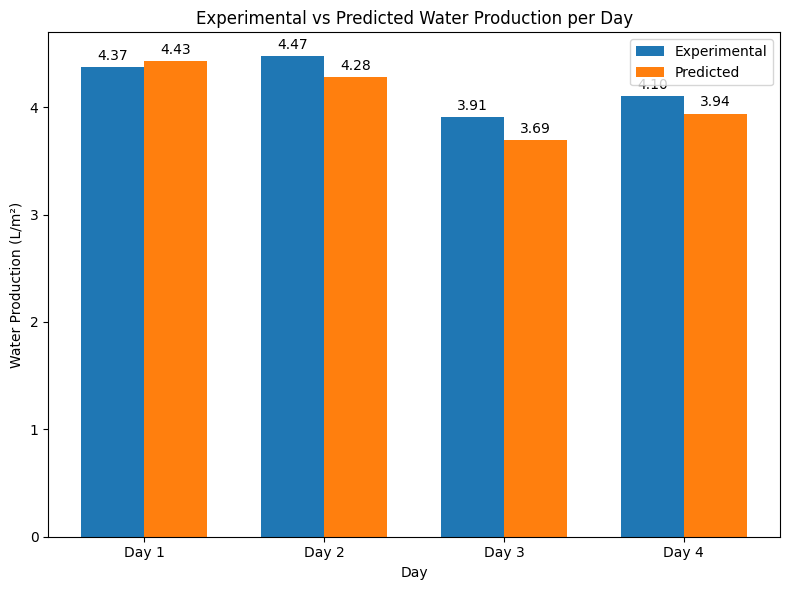

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Data
days = ['Day 1', 'Day 2', 'Day 3', 'Day 4']
experimental = [4.3713, 4.4735, 3.9051, 4.1000]
predicted = [4.4264, 4.2802, 3.6940, 3.9403]

x = np.arange(len(days))
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, experimental, width, label='Experimental', color='tab:blue')
rects2 = ax.bar(x + width/2, predicted, width, label='Predicted', color='tab:orange')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Day')
ax.set_ylabel('Water Production (L/m²)')
ax.set_title('Experimental vs Predicted Water Production per Day')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()

# Annotate each bar with its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig('barplot_experimental_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.savefig('barplot_experimental_vs_predicted.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Water_SVR


--- Train Set Metrics (SVR) ---
MAE: 0.0097
R²: 0.9675
RMSE: 0.0168
COV: 0.1468
EC: 0.9675
OI: 0.9916
MAPE: 0.1419
CRM: 0.0282
MRE: -0.0259
CC: 0.9843
COD: 0.9688
OI_MP: 0.9916

--- Test Set Metrics (SVR) ---
MAE: 0.0118
R²: 0.9707
RMSE: 0.0167
COV: 0.1482
EC: 0.9707
OI: 0.9928
MAPE: 0.2946
CRM: 0.0342
MRE: -0.0583
CC: 0.9866
COD: 0.9734
OI_MP: 0.9928


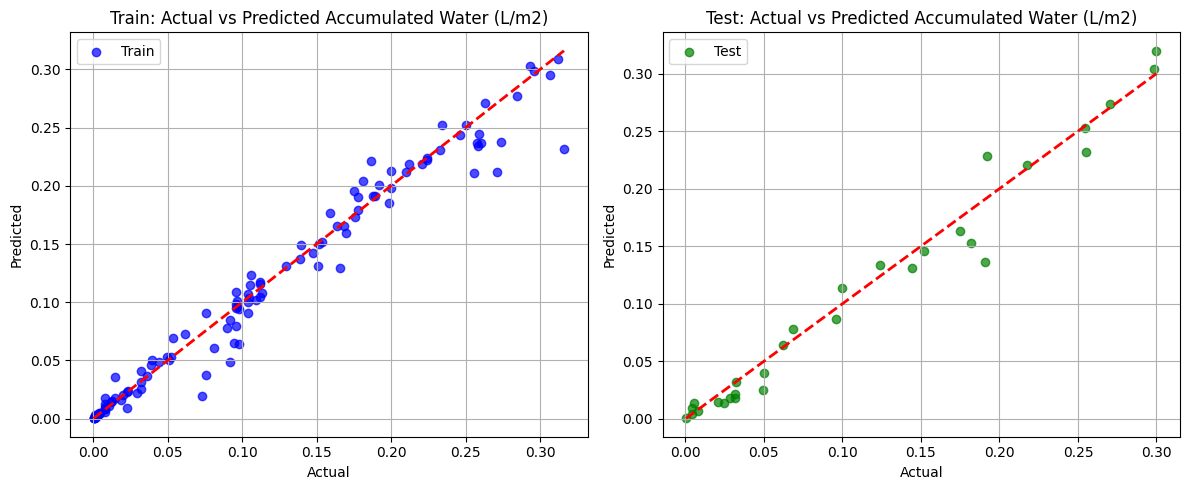

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Ex_in', 'OGT-IGT', 'BWT*Time']
target = 'Accumulated Water (L/m2)'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Only SVR
svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
svr.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_svr_test = svr.predict(X_test_scaled)

# No stacking, just use SVR predictions
y_pred_train_log = pred_svr_train
y_pred_test_log = pred_svr_test

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (SVR) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (SVR) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Accumulated Water (L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Accumulated Water (L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Water_Random Forest


--- Train Set Metrics (RF) ---
MAE: 0.0064
R²: 0.9890
RMSE: 0.0098
COV: 0.0854
EC: 0.9890
OI: 0.9972
MAPE: 0.0974
CRM: 0.0172
MRE: -0.0036
CC: 0.9947
COD: 0.9895
OI_MP: 0.9972

--- Test Set Metrics (RF) ---
MAE: 0.0134
R²: 0.9490
RMSE: 0.0220
COV: 0.1955
EC: 0.9490
OI: 0.9870
MAPE: 0.3438
CRM: 0.0396
MRE: -0.1128
CC: 0.9754
COD: 0.9513
OI_MP: 0.9870


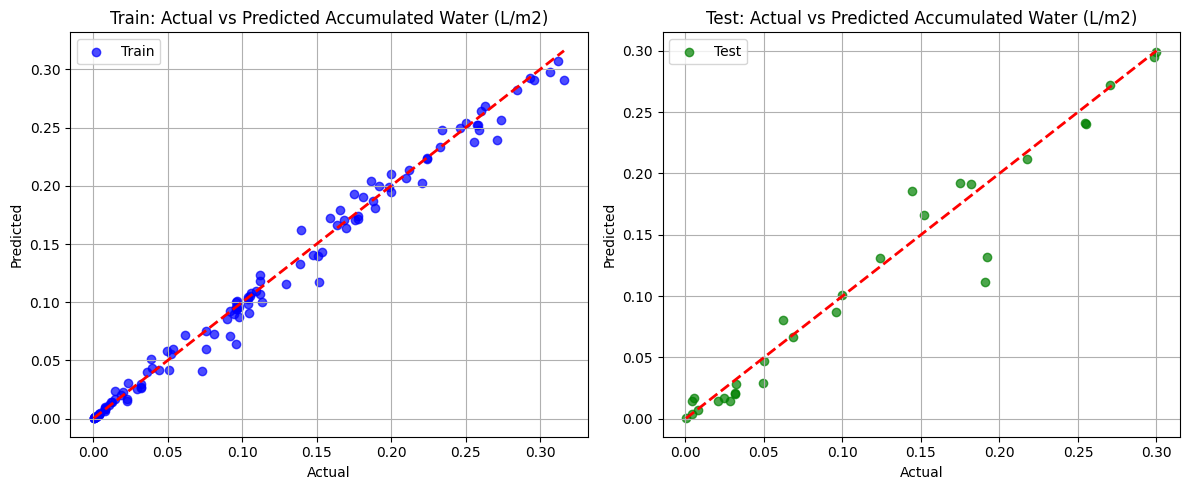

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Ex_in', 'OGT-IGT', 'BWT*Time']
target = 'Accumulated Water (L/m2)'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Only RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

pred_rf_train = rf.predict(X_train_scaled)
pred_rf_test = rf.predict(X_test_scaled)

# No stacking, just use RF predictions
y_pred_train_log = pred_rf_train
y_pred_test_log = pred_rf_test

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (RF) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (RF) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Accumulated Water (L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Accumulated Water (L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Water_XGboost


--- Train Set Metrics (XGB) ---
MAE: 0.0001
R²: 1.0000
RMSE: 0.0001
COV: 0.0013
EC: 1.0000
OI: 1.0000
MAPE: 0.0009
CRM: 0.0001
MRE: -0.0000
CC: 1.0000
COD: 1.0000
OI_MP: 1.0000

--- Test Set Metrics (XGB) ---
MAE: 0.0134
R²: 0.9600
RMSE: 0.0195
COV: 0.1731
EC: 0.9600
OI: 0.9897
MAPE: 0.3314
CRM: 0.0566
MRE: -0.1024
CC: 0.9820
COD: 0.9643
OI_MP: 0.9897


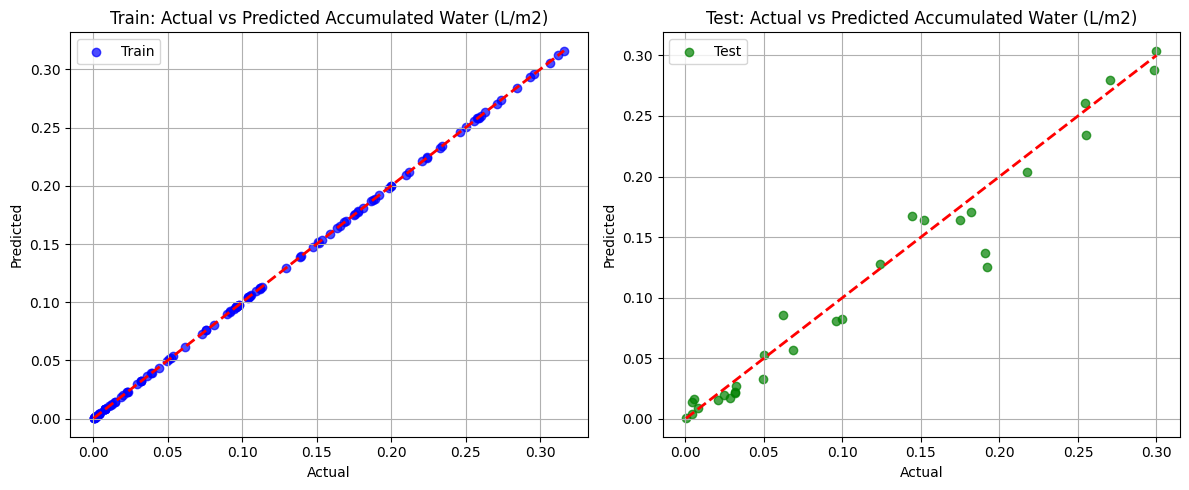

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Ex_in', 'OGT-IGT', 'BWT*Time']
target = 'Accumulated Water (L/m2)'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Only XGBRegressor
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train_scaled, y_train)

pred_xgb_train = xgb.predict(X_train_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)

# No stacking, just use XGB predictions
y_pred_train_log = pred_xgb_train
y_pred_test_log = pred_xgb_test

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (XGB) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (XGB) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Accumulated Water (L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Accumulated Water (L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Water_MLP


--- Train Set Metrics (MLP) ---
MAE: 0.0177
R²: 0.9332
RMSE: 0.0240
COV: 0.2103
EC: 0.9332
OI: 0.9823
MAPE: 0.2871
CRM: 0.0411
MRE: -0.0730
CC: 0.9673
COD: 0.9358
OI_MP: 0.9823

--- Test Set Metrics (MLP) ---
MAE: 0.0191
R²: 0.9232
RMSE: 0.0270
COV: 0.2400
EC: 0.9232
OI: 0.9803
MAPE: 0.4162
CRM: 0.0910
MRE: -0.0575
CC: 0.9667
COD: 0.9344
OI_MP: 0.9803


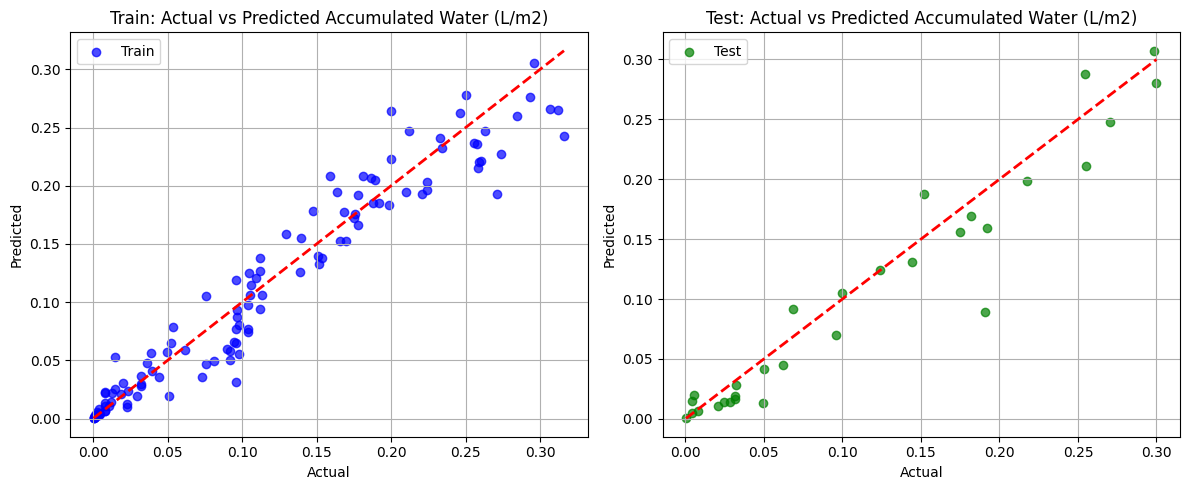

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Ex_in', 'OGT-IGT', 'BWT*Time']
target = 'Accumulated Water (L/m2)'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Only MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

pred_mlp_train = mlp.predict(X_train_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

# No stacking, just use MLP predictions
y_pred_train_log = pred_mlp_train
y_pred_test_log = pred_mlp_test

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (MLP) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (MLP) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Accumulated Water (L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Accumulated Water (L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Thermal Efficiency Prediction using Ensemble Log stacking


--- Train Set Metrics (Log-Stacking) ---
MAE: 0.0112
R²: 0.9986
RMSE: 0.0210
COV: 0.0240
EC: 0.9986
OI: 0.9996
MAPE: 0.0176
CRM: 0.0039
MRE: 0.0014
CC: 0.9993
COD: 0.9986
OI_MP: 0.9996

--- Test Set Metrics (Log-Stacking) ---
MAE: 0.0287
R²: 0.9942
RMSE: 0.0428
COV: 0.0494
EC: 0.9942
OI: 0.9985
MAPE: 0.0904
CRM: 0.0164
MRE: -0.0264
CC: 0.9974
COD: 0.9949
OI_MP: 0.9985


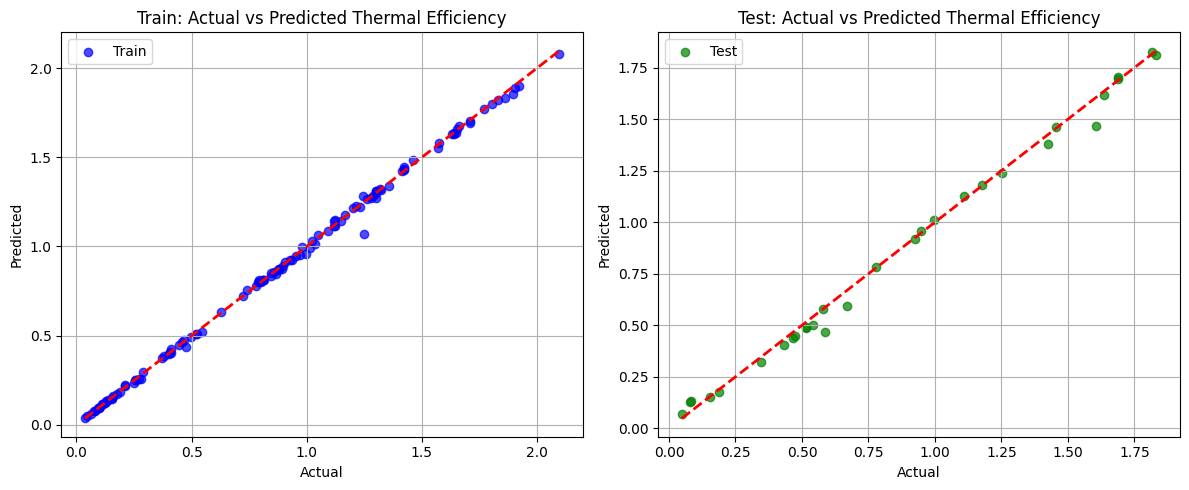

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Accumulated Water (L/m2)']
target = 'Thermal energy efficiency'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

y_pred_train_log = (
    0.5 * pred_svr_train +
    0.2 * pred_rf_train +
    0.2 * pred_xgb_train +
    0.1 * pred_mlp_train
)

y_pred_test_log = (
    0.5 * pred_svr_test +
    0.2 * pred_rf_test +
    0.2 * pred_xgb_test +
    0.1 * pred_mlp_test
)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Thermal Efficiency")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Thermal Efficiency")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Thermal SVR


--- Train Set Metrics (SVR) ---
MAE: 0.0075
R²: 0.9997
RMSE: 0.0102
COV: 0.0117
EC: 0.9997
OI: 0.9999
MAPE: 0.0090
CRM: 0.0001
MRE: -0.0005
CC: 0.9998
COD: 0.9997
OI_MP: 0.9999

--- Test Set Metrics (SVR) ---
MAE: 0.0130
R²: 0.9982
RMSE: 0.0241
COV: 0.0278
EC: 0.9982
OI: 0.9995
MAPE: 0.0287
CRM: 0.0086
MRE: -0.0080
CC: 0.9993
COD: 0.9985
OI_MP: 0.9995


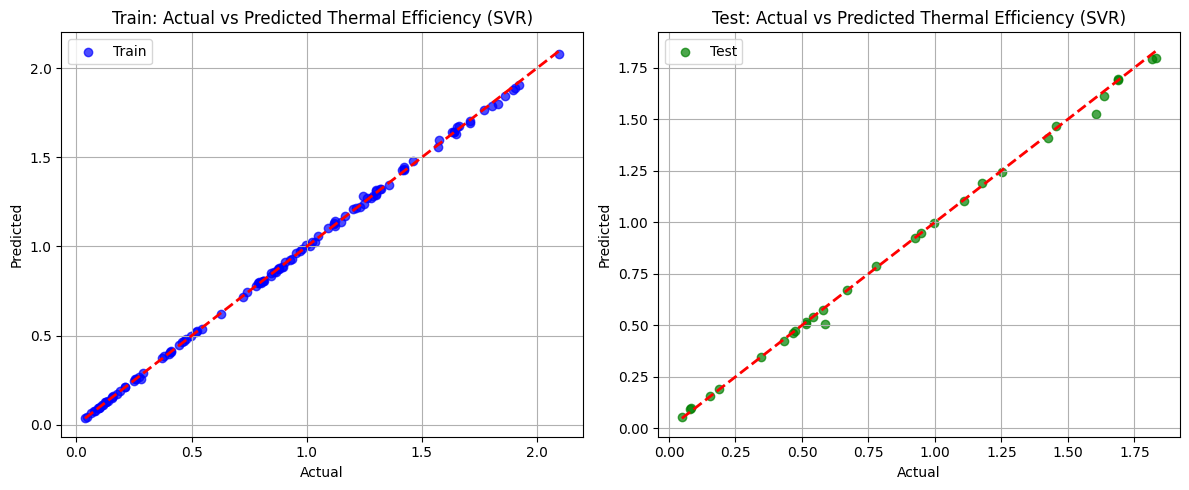

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Accumulated Water (L/m2)']
target = 'Thermal energy efficiency'

# Log transform (replace non-positive values)
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
svr.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_svr_test = svr.predict(X_test_scaled)

# Inverse log transform to get predictions in original scale
y_pred_train = np.exp(pred_svr_train)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(pred_svr_test)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (SVR) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (SVR) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Thermal Efficiency (SVR)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Thermal Efficiency (SVR)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Thermal Efficiency Random forest


--- Train Set Metrics (Random Forest) ---
MAE: 0.0258
R²: 0.9860
RMSE: 0.0655
COV: 0.0748
EC: 0.9860
OI: 0.9965
MAPE: 0.0487
CRM: 0.0126
MRE: 0.0048
CC: 0.9932
COD: 0.9864
OI_MP: 0.9965

--- Test Set Metrics (Random Forest) ---
MAE: 0.0732
R²: 0.9695
RMSE: 0.0983
COV: 0.1134
EC: 0.9695
OI: 0.9924
MAPE: 0.2298
CRM: 0.0171
MRE: -0.0907
CC: 0.9852
COD: 0.9706
OI_MP: 0.9924


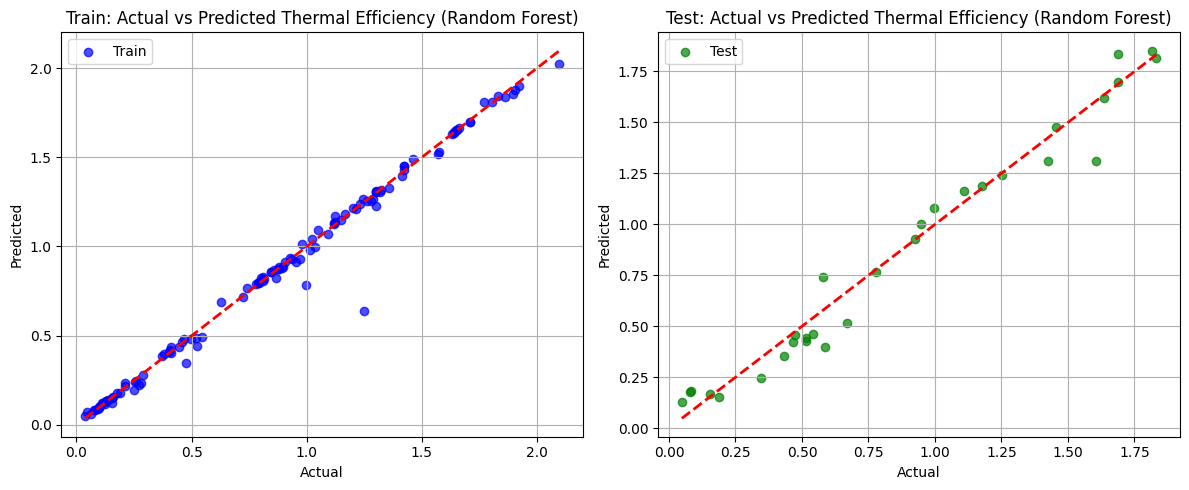

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Accumulated Water (L/m2)']
target = 'Thermal energy efficiency'

# Log transform (replace non-positive values)
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

pred_rf_train = rf.predict(X_train_scaled)
pred_rf_test = rf.predict(X_test_scaled)

# Inverse log transform to get predictions in original scale
y_pred_train = np.exp(pred_rf_train)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(pred_rf_test)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Random Forest) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Random Forest) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Thermal Efficiency (Random Forest)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Thermal Efficiency (Random Forest)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Thermal Efficiency XGboost


--- Train Set Metrics (XGBRegressor) ---
MAE: 0.0007
R²: 1.0000
RMSE: 0.0010
COV: 0.0012
EC: 1.0000
OI: 1.0000
MAPE: 0.0008
CRM: 0.0001
MRE: -0.0000
CC: 1.0000
COD: 1.0000
OI_MP: 1.0000

--- Test Set Metrics (XGBRegressor) ---
MAE: 0.0493
R²: 0.9832
RMSE: 0.0731
COV: 0.0843
EC: 0.9832
OI: 0.9957
MAPE: 0.1653
CRM: 0.0286
MRE: -0.0595
CC: 0.9926
COD: 0.9852
OI_MP: 0.9957


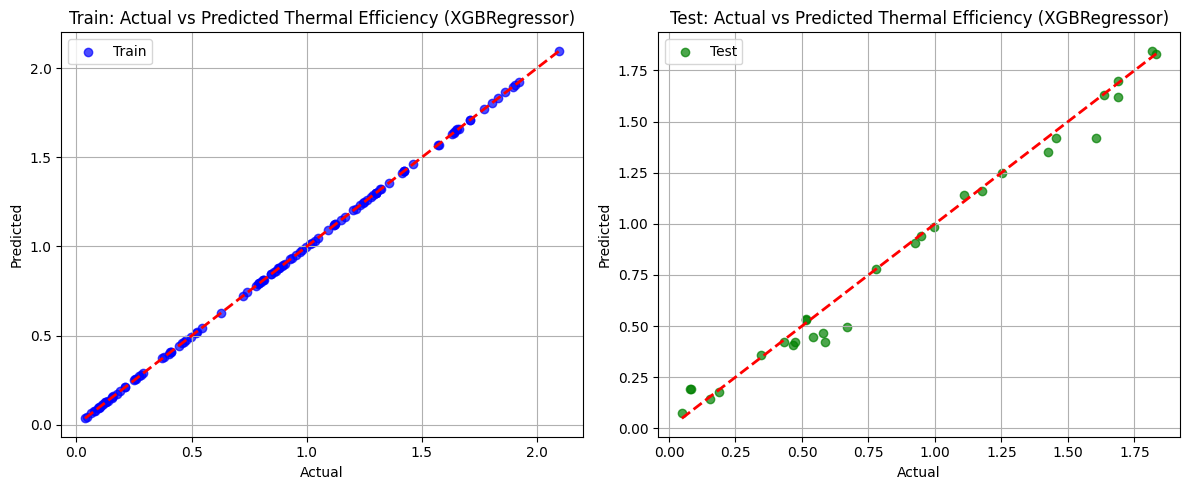

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Accumulated Water (L/m2)']
target = 'Thermal energy efficiency'

# Log transform (replace non-positive values)
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train_scaled, y_train)

pred_xgb_train = xgb.predict(X_train_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)

# Inverse log transform to get predictions in original scale
y_pred_train = np.exp(pred_xgb_train)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(pred_xgb_test)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (XGBRegressor) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (XGBRegressor) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Thermal Efficiency (XGBRegressor)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Thermal Efficiency (XGBRegressor)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Thermal Efficiency MLP


--- Train Set Metrics (MLP) ---
MAE: 0.0421
R²: 0.9893
RMSE: 0.0572
COV: 0.0653
EC: 0.9893
OI: 0.9973
MAPE: 0.0642
CRM: 0.0067
MRE: -0.0043
CC: 0.9947
COD: 0.9894
OI_MP: 0.9973

--- Test Set Metrics (MLP) ---
MAE: 0.0413
R²: 0.9920
RMSE: 0.0504
COV: 0.0582
EC: 0.9920
OI: 0.9980
MAPE: 0.1339
CRM: 0.0098
MRE: -0.0321
CC: 0.9966
COD: 0.9932
OI_MP: 0.9980


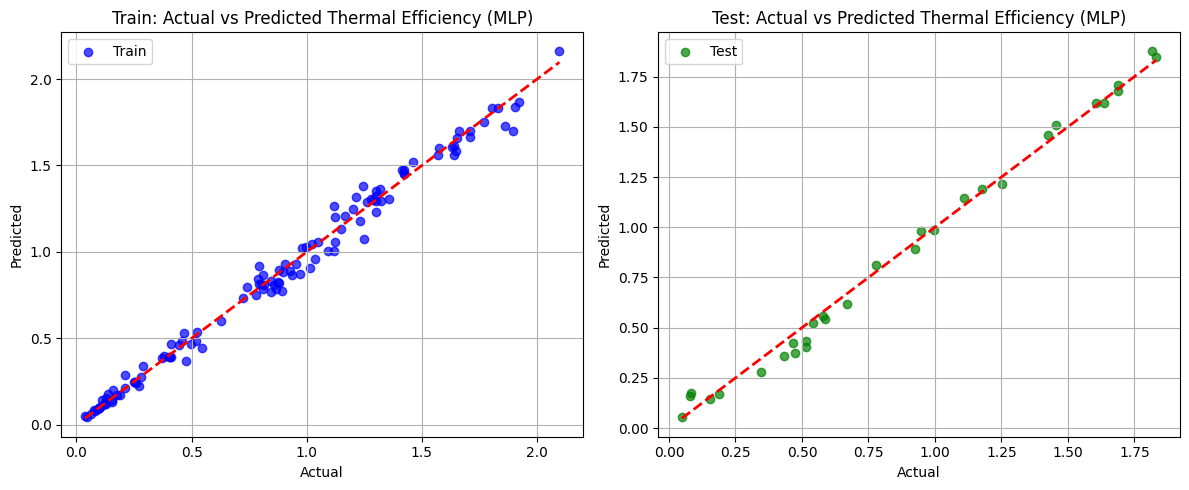

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Accumulated Water (L/m2)']
target = 'Thermal energy efficiency'

# Log transform (replace non-positive values)
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

pred_mlp_train = mlp.predict(X_train_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

# Inverse log transform to get predictions in original scale
y_pred_train = np.exp(pred_mlp_train)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(pred_mlp_test)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (MLP) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (MLP) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Thermal Efficiency (MLP)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Thermal Efficiency (MLP)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Demo Test vs Actual


--- Train Set Metrics (Log-Stacking) ---
MAE: 0.0112
R²: 0.9986
RMSE: 0.0210
COV: 0.0240
EC: 0.9986
OI: 0.9996
MAPE: 0.0176
CRM: 0.0039
MRE: 0.0014
CC: 0.9993
COD: 0.9986
OI_MP: 0.9996

--- Test Set Metrics (Log-Stacking) ---
MAE: 0.0287
R²: 0.9942
RMSE: 0.0428
COV: 0.0494
EC: 0.9942
OI: 0.9985
MAPE: 0.0904
CRM: 0.0164
MRE: -0.0264
CC: 0.9974
COD: 0.9949
OI_MP: 0.9985


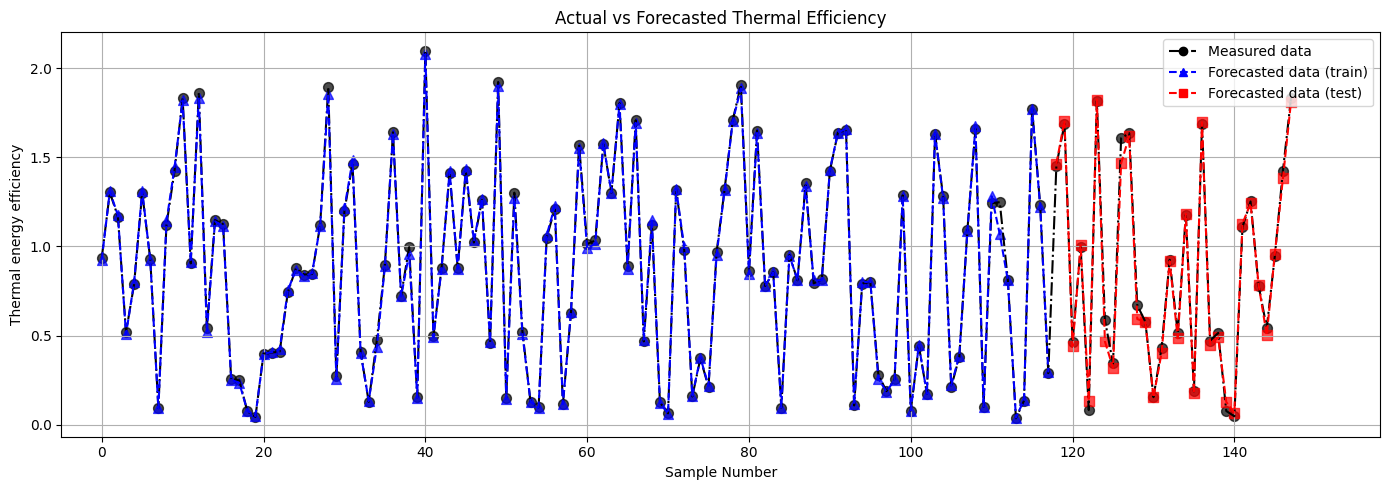

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Assume dfff is your DataFrame (already loaded and cleaned)
df2 = dfff.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Accumulated Water (L/m2)']
target = 'Thermal energy efficiency'

# Replace non-positive values and take log
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

y_pred_train_log = (
    0.5 * pred_svr_train +
    0.2 * pred_rf_train +
    0.2 * pred_xgb_train +
    0.1 * pred_mlp_train
)

y_pred_test_log = (
    0.5 * pred_svr_test +
    0.2 * pred_rf_test +
    0.2 * pred_xgb_test +
    0.1 * pred_mlp_test
)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

# ---- Actual vs Predicted Series Plot with markers, expanded x-axis, and legend with symbols ----
actual = np.concatenate([y_train_actual, y_test_actual])
predicted = np.concatenate([y_pred_train, y_pred_test])
x = np.arange(len(actual))
split_idx = len(y_train_actual)

plt.figure(figsize=(14, 5))  # Wider figure for better visualization

# Plot lines and points (symbols)
line1, = plt.plot(x, actual, 'k-.', label='Measured data')
points1 = plt.scatter(x, actual, color='black', marker='o', s=50, alpha=0.7, label='Measured data (o)')

line2, = plt.plot(x[:split_idx], predicted[:split_idx], 'b--', label='Forecasted data (train)')
points2 = plt.scatter(x[:split_idx], predicted[:split_idx], color='blue', marker='^', s=50, alpha=0.7, label='Forecasted data (train, ^)')

line3, = plt.plot(x[split_idx:], predicted[split_idx:], 'r--', label='Forecasted data (test)')
points3 = plt.scatter(x[split_idx:], predicted[split_idx:], color='red', marker='s', s=50, alpha=0.7, label='Forecasted data (test, s)')

plt.xlabel('Sample Number')
plt.ylabel('Thermal energy efficiency')
plt.title('Actual vs Forecasted Thermal Efficiency')
plt.grid(True)
plt.tight_layout()

plt.xlim(-5, len(actual)+10)  # Expand x-axis for better visualization

# Custom legend handles with line and marker symbols
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='k', linestyle='-.', marker='o', label='Measured data'),
    Line2D([0], [0], color='b', linestyle='--', marker='^', label='Forecasted data (train)'),
    Line2D([0], [0], color='r', linestyle='--', marker='s', label='Forecasted data (test)')
]
plt.legend(handles=legend_elements, loc='best')

plt.show()

# Final Ensemble Approach for Thermal Efficiency


--- Train Set Metrics (Log-Stacking) ---
MAE: 0.0112
R²: 0.9986
RMSE: 0.0210
COV: 0.0240
EC: 0.9986
OI: 0.9996
MAPE: 0.0176
CRM: 0.0039
MRE: 0.0014
CC: 0.9993
COD: 0.9986
OI_MP: 0.9996

--- Test Set Metrics (Log-Stacking) ---
MAE: 0.0287
R²: 0.9942
RMSE: 0.0428
COV: 0.0494
EC: 0.9942
OI: 0.9985
MAPE: 0.0904
CRM: 0.0164
MRE: -0.0264
CC: 0.9974
COD: 0.9949
OI_MP: 0.9985


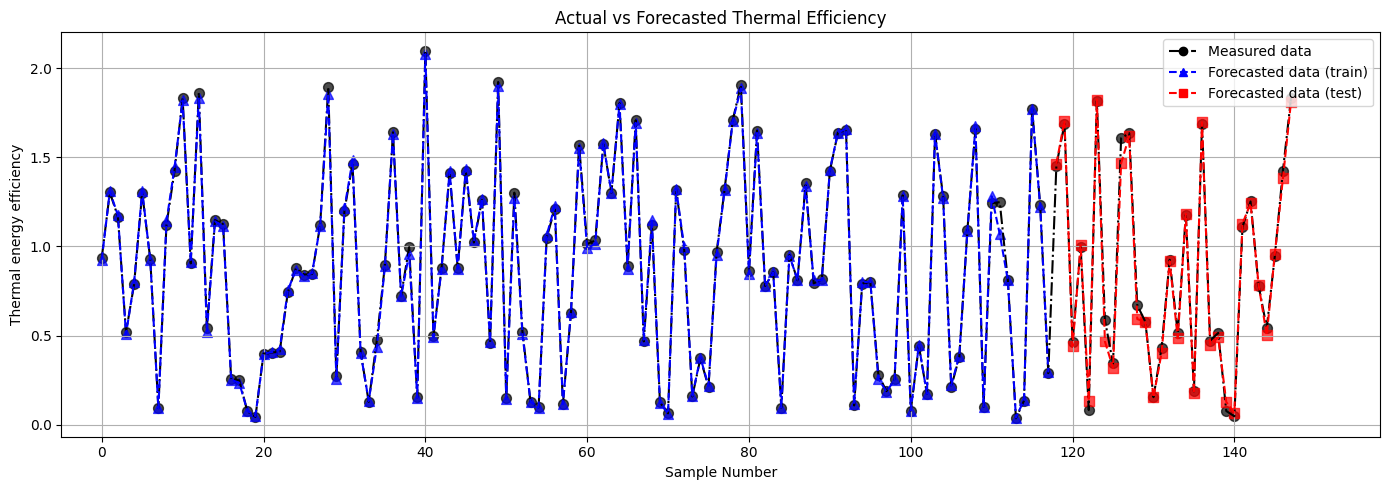

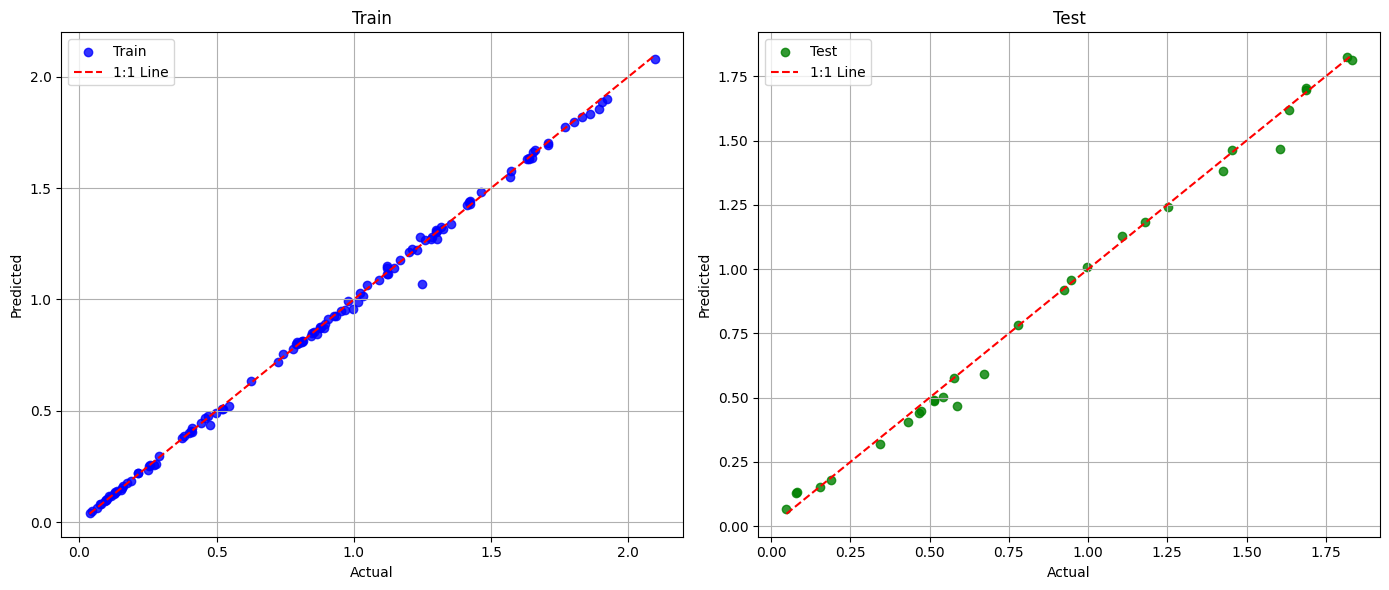

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# --- Assume dfff is your DataFrame (already loaded and cleaned) ---
# For demonstration, let's create a dummy DataFrame (comment this out if you already have dfff)
# dfff = pd.DataFrame({
#     'Solar irradiance(W/m2)': np.random.uniform(200, 1000, 120),
#     'Outer glass temperature': np.random.uniform(20, 80, 120),
#     'Inner glass temperature': np.random.uniform(20, 80, 120),
#     'Basin water temperature': np.random.uniform(20, 80, 120),
#     'Ti': np.random.uniform(0.5, 3.5, 120),
#     'Accumulated Water (L/m2)': np.random.uniform(0.1, 5, 120),
#     'Thermal energy efficiency': np.random.uniform(0.1, 2, 120)
# })
df2 = dfff.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Accumulated Water (L/m2)']
target = 'Thermal energy efficiency'

# Replace non-positive values and take log
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

y_pred_train_log = (
    0.5 * pred_svr_train +
    0.2 * pred_rf_train +
    0.2 * pred_xgb_train +
    0.1 * pred_mlp_train
)

y_pred_test_log = (
    0.5 * pred_svr_test +
    0.2 * pred_rf_test +
    0.2 * pred_xgb_test +
    0.1 * pred_mlp_test
)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

# ---- Actual vs Predicted Series Plot with markers, expanded x-axis, and legend with symbols ----
actual = np.concatenate([y_train_actual, y_test_actual])
predicted = np.concatenate([y_pred_train, y_pred_test])
x = np.arange(len(actual))
split_idx = len(y_train_actual)

plt.figure(figsize=(14, 5))  # Wider figure for better visualization

# Plot lines and points (symbols)
line1, = plt.plot(x, actual, 'k-.', label='Measured data')
points1 = plt.scatter(x, actual, color='black', marker='o', s=50, alpha=0.7, label='Measured data (o)')

line2, = plt.plot(x[:split_idx], predicted[:split_idx], 'b--', label='Forecasted data (train)')
points2 = plt.scatter(x[:split_idx], predicted[:split_idx], color='blue', marker='^', s=50, alpha=0.7, label='Forecasted data (train, ^)')

line3, = plt.plot(x[split_idx:], predicted[split_idx:], 'r--', label='Forecasted data (test)')
points3 = plt.scatter(x[split_idx:], predicted[split_idx:], color='red', marker='s', s=50, alpha=0.7, label='Forecasted data (test, s)')

plt.xlabel('Sample Number')
plt.ylabel('Thermal energy efficiency')
plt.title('Actual vs Forecasted Thermal Efficiency')
plt.grid(True)
plt.tight_layout()

plt.xlim(-5, len(actual)+10)  # Expand x-axis for better visualization

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='k', linestyle='-.', marker='o', label='Measured data'),
    Line2D([0], [0], color='b', linestyle='--', marker='^', label='Forecasted data (train)'),
    Line2D([0], [0], color='r', linestyle='--', marker='s', label='Forecasted data (test)')
]
plt.legend(handles=legend_elements, loc='best')

plt.savefig('thermal_efficiency_actual_vs_predicted_series.png', dpi=300, bbox_inches='tight')
plt.savefig('thermal_efficiency_actual_vs_predicted_series.pdf', dpi=300, bbox_inches='tight')
plt.show()

# ---- Actual vs Predicted Scatter Plots for Train and Test ----
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Train set
axs[0].scatter(y_train_actual, y_pred_train, color='blue', label='Train', alpha=0.8)
axs[0].plot([min(y_train_actual), max(y_train_actual)],
            [min(y_train_actual), max(y_train_actual)],
            'r--', label='1:1 Line')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Train')
axs[0].legend()
axs[0].grid(True)

# Test set
axs[1].scatter(y_test_actual, y_pred_test, color='green', label='Test', alpha=0.8)
axs[1].plot([min(y_test_actual), max(y_test_actual)],
            [min(y_test_actual), max(y_test_actual)],
            'r--', label='1:1 Line')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Test')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig('thermal_efficiency_actual_vs_predicted_scatter.png', dpi=300, bbox_inches='tight')
plt.savefig('thermal_efficiency_actual_vs_predicted_scatter.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Exercy Efficiency Prediction


--- Train Set Metrics (Log-Stacking) ---
MAE: 0.6392
R²: 0.9994
RMSE: 0.9001
COV: 0.0205
EC: 0.9994
OI: 0.9998
MAPE: 0.0261
CRM: 0.0019
MRE: 0.0016
CC: 0.9997
COD: 0.9994
OI_MP: 0.9998

--- Test Set Metrics (Log-Stacking) ---
MAE: 1.4151
R²: 0.9977
RMSE: 1.9717
COV: 0.0429
EC: 0.9977
OI: 0.9994
MAPE: 0.1346
CRM: 0.0171
MRE: -0.0599
CC: 0.9991
COD: 0.9982
OI_MP: 0.9994


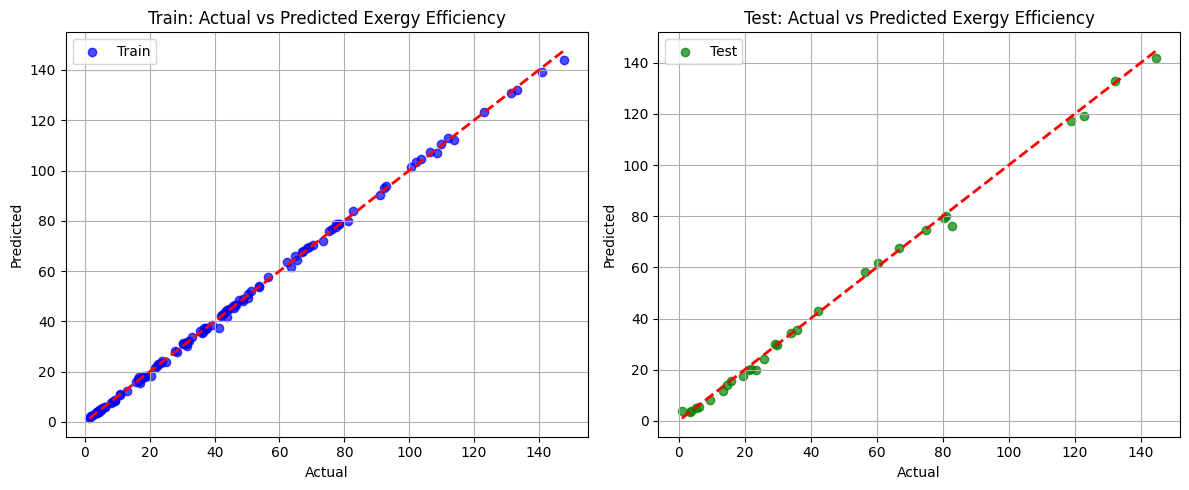

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = [
    'Ex_out', 'Ex_in'
]
target = 'Exergy_efficiency'

# Ensure all features and target are positive for log-transform
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

# Log-stacking weighted ensemble
y_pred_train_log = (
    0.5 * pred_svr_train +
    0.2 * pred_rf_train +
    0.2 * pred_xgb_train +
    0.1 * pred_mlp_train
)
y_pred_test_log = (
    0.5 * pred_svr_test +
    0.2 * pred_rf_test +
    0.2 * pred_xgb_test +
    0.1 * pred_mlp_test
)

# Inverse log transform to get predictions in original scale
y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Exergy Efficiency")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Exergy Efficiency")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# SVR Exercy


--- Train Set Metrics (SVR) ---
MAE: 0.3173
R²: 0.9998
RMSE: 0.5533
COV: 0.0126
EC: 0.9998
OI: 0.9999
MAPE: 0.0078
CRM: 0.0005
MRE: 0.0008
CC: 0.9999
COD: 0.9998
OI_MP: 0.9999

--- Test Set Metrics (SVR) ---
MAE: 0.2995
R²: 0.9998
RMSE: 0.5376
COV: 0.0117
EC: 0.9998
OI: 1.0000
MAPE: 0.0143
CRM: 0.0015
MRE: -0.0073
CC: 0.9999
COD: 0.9999
OI_MP: 1.0000


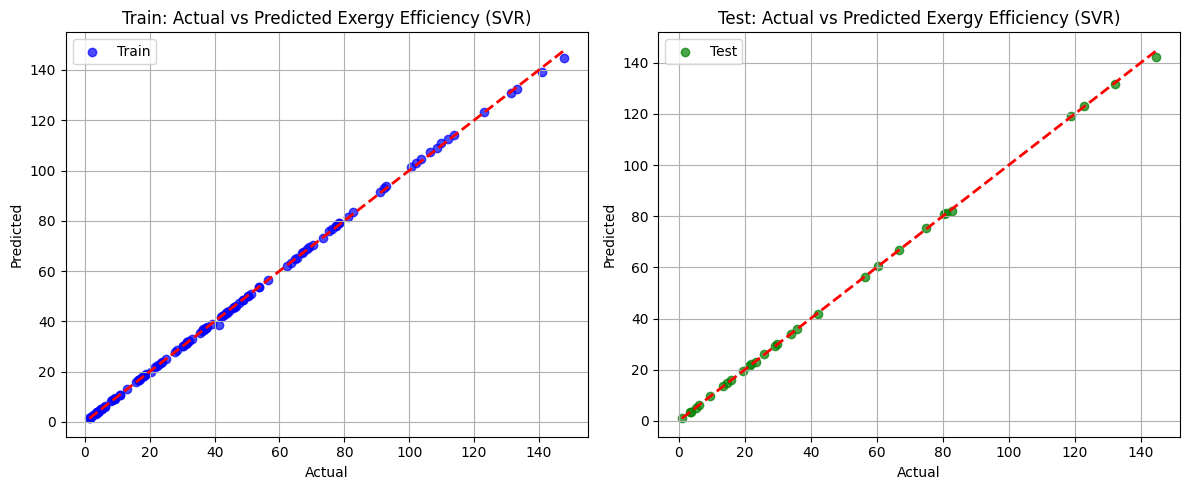

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = [
    'Ex_out', 'Ex_in'
]
target = 'Exergy_efficiency'

# Ensure all features and target are positive for log-transform
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
svr.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_svr_test = svr.predict(X_test_scaled)

# Inverse log transform to get predictions in original scale
y_pred_train = np.exp(pred_svr_train)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(pred_svr_test)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (SVR) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (SVR) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Exergy Efficiency (SVR)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Exergy Efficiency (SVR)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


--- Train Set Metrics (Random Forest) ---
MAE: 1.1179
R²: 0.9971
RMSE: 1.9159
COV: 0.0437
EC: 0.9971
OI: 0.9993
MAPE: 0.0574
CRM: 0.0058
MRE: -0.0013
CC: 0.9986
COD: 0.9972
OI_MP: 0.9993

--- Test Set Metrics (Random Forest) ---
MAE: 2.6319
R²: 0.9917
RMSE: 3.7301
COV: 0.0812
EC: 0.9917
OI: 0.9979
MAPE: 0.3802
CRM: 0.0141
MRE: -0.2673
CC: 0.9960
COD: 0.9920
OI_MP: 0.9979


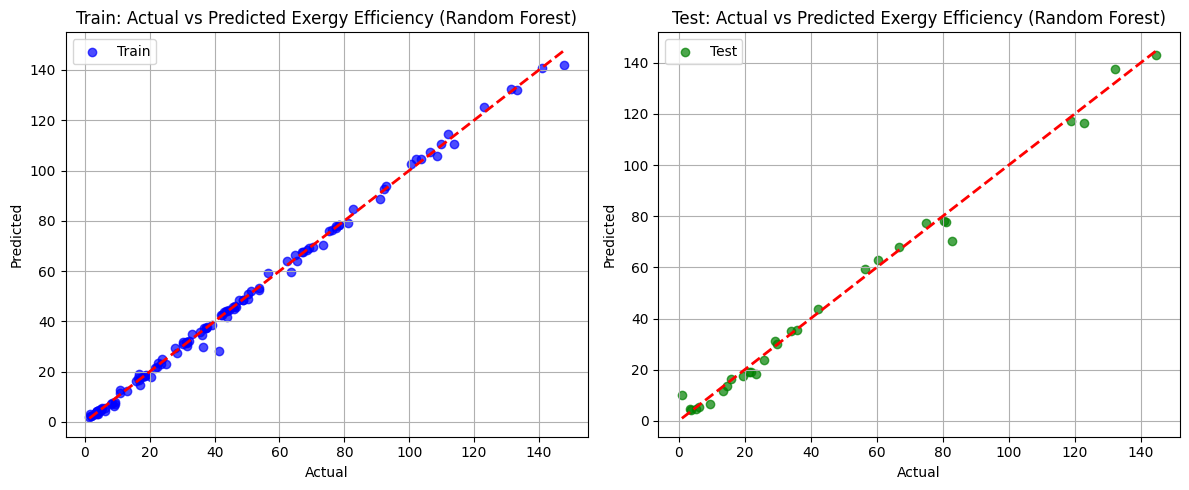

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Ex_out', 'Ex_in']
target = 'Exergy_efficiency'

# Ensure all features and target are positive for log-transform
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

pred_rf_train = rf.predict(X_train_scaled)
pred_rf_test = rf.predict(X_test_scaled)

# Inverse log transform to get predictions in original scale
y_pred_train = np.exp(pred_rf_train)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(pred_rf_test)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Random Forest) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Random Forest) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Exergy Efficiency (Random Forest)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Exergy Efficiency (Random Forest)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Exercy XGBRegressor


--- Train Set Metrics (XGBRegressor) ---
MAE: 0.0595
R²: 1.0000
RMSE: 0.0949
COV: 0.0022
EC: 1.0000
OI: 1.0000
MAPE: 0.0015
CRM: 0.0001
MRE: -0.0000
CC: 1.0000
COD: 1.0000
OI_MP: 1.0000

--- Test Set Metrics (XGBRegressor) ---
MAE: 3.4376
R²: 0.9790
RMSE: 5.9435
COV: 0.1294
EC: 0.9790
OI: 0.9945
MAPE: 0.9325
CRM: 0.0191
MRE: -0.8084
CC: 0.9904
COD: 0.9808
OI_MP: 0.9945


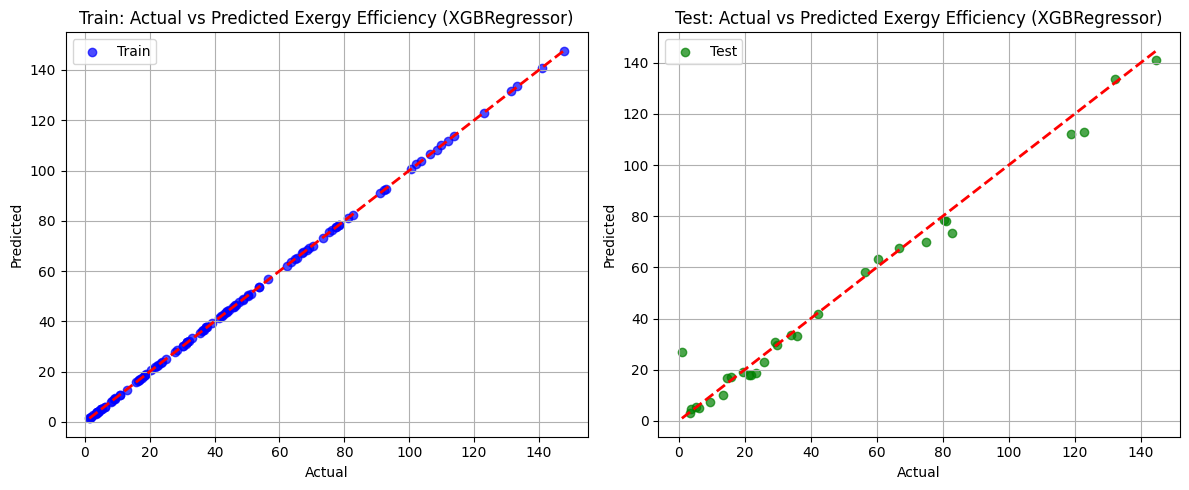

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Ex_out', 'Ex_in']
target = 'Exergy_efficiency'

# Ensure all features and target are positive for log-transform
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train_scaled, y_train)

pred_xgb_train = xgb.predict(X_train_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)

# Inverse log transform to get predictions in original scale
y_pred_train = np.exp(pred_xgb_train)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(pred_xgb_test)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (XGBRegressor) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (XGBRegressor) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Exergy Efficiency (XGBRegressor)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Exergy Efficiency (XGBRegressor)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Exercy MLP


--- Train Set Metrics (MLP) ---
MAE: 4.0116
R²: 0.9811
RMSE: 4.9332
COV: 0.1125
EC: 0.9811
OI: 0.9953
MAPE: 0.1679
CRM: -0.0046
MRE: -0.0172
CC: 0.9906
COD: 0.9812
OI_MP: 0.9953

--- Test Set Metrics (MLP) ---
MAE: 4.4652
R²: 0.9803
RMSE: 5.7526
COV: 0.1252
EC: 0.9803
OI: 0.9951
MAPE: 0.2143
CRM: 0.0467
MRE: 0.0668
CC: 0.9915
COD: 0.9831
OI_MP: 0.9951


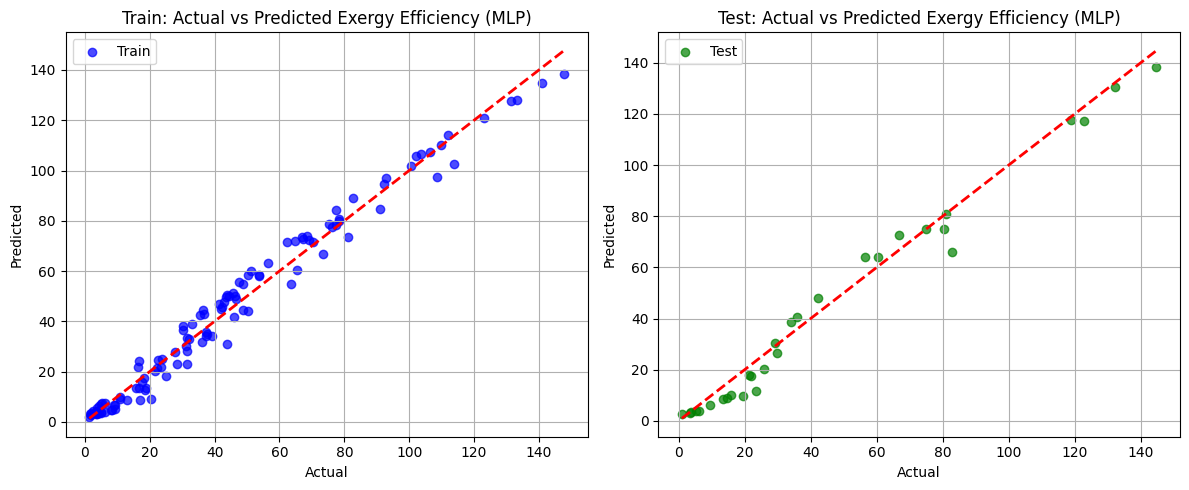

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = dfff.copy()

features = ['Ex_out', 'Ex_in']
target = 'Exergy_efficiency'

# Ensure all features and target are positive for log-transform
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

pred_mlp_train = mlp.predict(X_train_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

# Inverse log transform to get predictions in original scale
y_pred_train = np.exp(pred_mlp_train)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(pred_mlp_test)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (MLP) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (MLP) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Exergy Efficiency (MLP)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Exergy Efficiency (MLP)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Final Ensemble approach for Exercy 


--- Train Set Metrics (Log-Stacking) ---
MAE: 0.6392
R²: 0.9994
RMSE: 0.9001
COV: 0.0205
EC: 0.9994
OI: 0.9998
MAPE: 0.0261
CRM: 0.0019
MRE: 0.0016
CC: 0.9997
COD: 0.9994
OI_MP: 0.9998

--- Test Set Metrics (Log-Stacking) ---
MAE: 1.4151
R²: 0.9977
RMSE: 1.9717
COV: 0.0429
EC: 0.9977
OI: 0.9994
MAPE: 0.1346
CRM: 0.0171
MRE: -0.0599
CC: 0.9991
COD: 0.9982
OI_MP: 0.9994


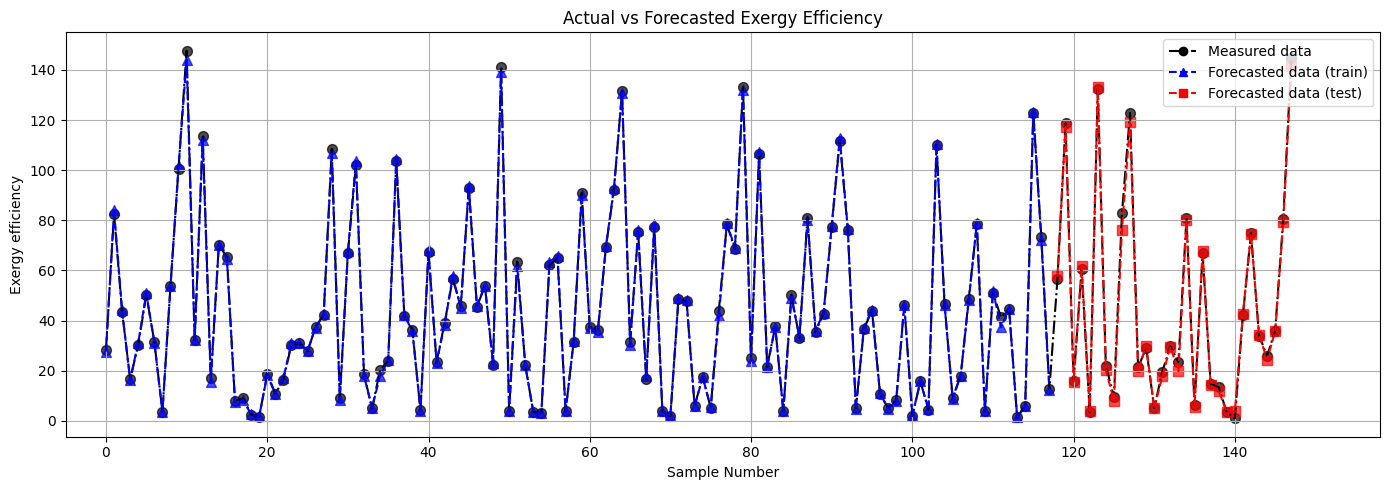

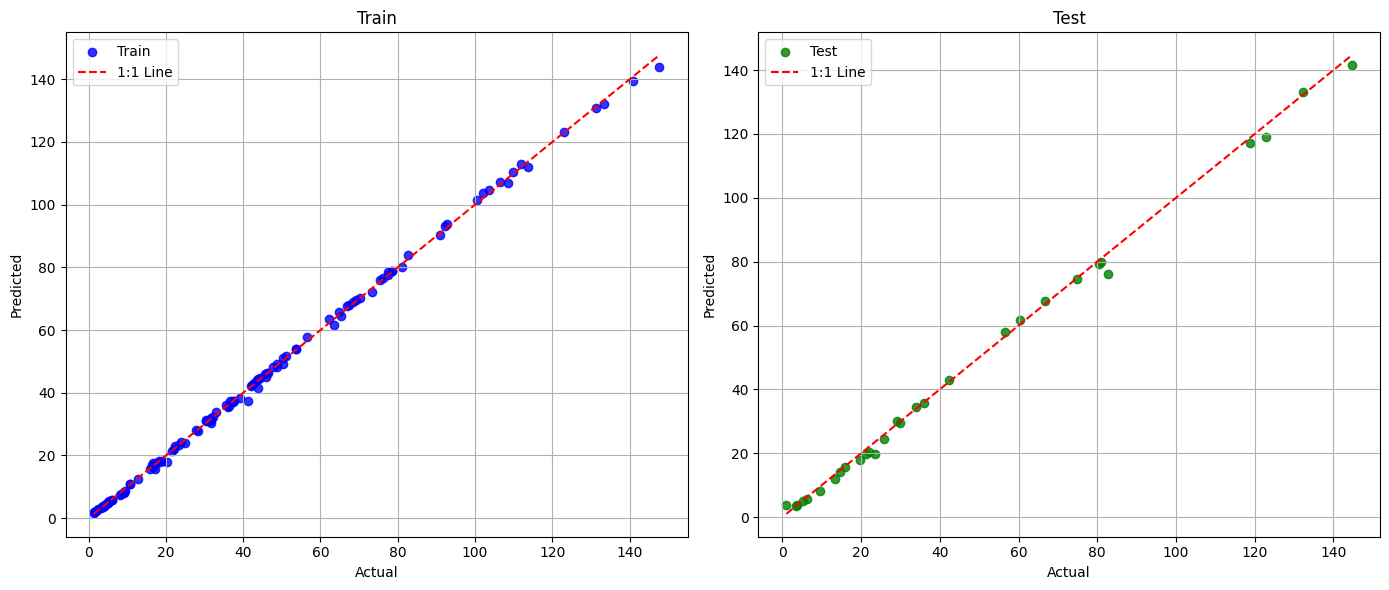

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# --- Assume dfff is your DataFrame (already loaded and cleaned) ---
# For demonstration, here's an example dummy DataFrame. Comment this out if you already have dfff.
# dfff = pd.DataFrame({
#     'Ex_out': np.random.uniform(1, 20, 120),
#     'Ex_in': np.random.uniform(1, 20, 120),
#     'Exergy_efficiency': np.random.uniform(0.1, 2, 120)
# })

df2 = dfff.copy()

features = ['Ex_out', 'Ex_in']
target = 'Exergy_efficiency'

# Replace non-positive values and take log
for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

y_pred_train_log = (
    0.5 * pred_svr_train +
    0.2 * pred_rf_train +
    0.2 * pred_xgb_train +
    0.1 * pred_mlp_train
)

y_pred_test_log = (
    0.5 * pred_svr_test +
    0.2 * pred_rf_test +
    0.2 * pred_xgb_test +
    0.1 * pred_mlp_test
)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

# ---- Actual vs Predicted Series Plot with markers, expanded x-axis, and legend with symbols ----
actual = np.concatenate([y_train_actual, y_test_actual])
predicted = np.concatenate([y_pred_train, y_pred_test])
x = np.arange(len(actual))
split_idx = len(y_train_actual)

plt.figure(figsize=(14, 5))  # Wider figure for better visualization

# Plot lines and points (symbols)
line1, = plt.plot(x, actual, 'k-.', label='Measured data')
points1 = plt.scatter(x, actual, color='black', marker='o', s=50, alpha=0.7, label='Measured data (o)')

line2, = plt.plot(x[:split_idx], predicted[:split_idx], 'b--', label='Forecasted data (train)')
points2 = plt.scatter(x[:split_idx], predicted[:split_idx], color='blue', marker='^', s=50, alpha=0.7, label='Forecasted data (train, ^)')

line3, = plt.plot(x[split_idx:], predicted[split_idx:], 'r--', label='Forecasted data (test)')
points3 = plt.scatter(x[split_idx:], predicted[split_idx:], color='red', marker='s', s=50, alpha=0.7, label='Forecasted data (test, s)')

plt.xlabel('Sample Number')
plt.ylabel('Exergy efficiency')
plt.title('Actual vs Forecasted Exergy Efficiency')
plt.grid(True)
plt.tight_layout()

plt.xlim(-5, len(actual)+10)  # Expand x-axis for better visualization

# Custom legend handles with line and marker symbols
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='k', linestyle='-.', marker='o', label='Measured data'),
    Line2D([0], [0], color='b', linestyle='--', marker='^', label='Forecasted data (train)'),
    Line2D([0], [0], color='r', linestyle='--', marker='s', label='Forecasted data (test)')
]
plt.legend(handles=legend_elements, loc='best')

plt.savefig('exergy_efficiency_actual_vs_predicted_series.png', dpi=300, bbox_inches='tight')
plt.savefig('exergy_efficiency_actual_vs_predicted_series.pdf', dpi=300, bbox_inches='tight')
plt.show()

# ---- Actual vs Predicted Scatter Plots for Train and Test ----
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Train set
axs[0].scatter(y_train_actual, y_pred_train, color='blue', label='Train', alpha=0.8)
axs[0].plot([min(y_train_actual), max(y_train_actual)],
            [min(y_train_actual), max(y_train_actual)],
            'r--', label='1:1 Line')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Train')
axs[0].legend()
axs[0].grid(True)

# Test set
axs[1].scatter(y_test_actual, y_pred_test, color='green', label='Test', alpha=0.8)
axs[1].plot([min(y_test_actual), max(y_test_actual)],
            [min(y_test_actual), max(y_test_actual)],
            'r--', label='1:1 Line')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Test')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig('exergy_efficiency_actual_vs_predicted_scatter.png', dpi=300, bbox_inches='tight')
plt.savefig('exergy_efficiency_actual_vs_predicted_scatter.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Water yeild prediction using Hybrid Model with Ridge Regression as Meta-Learner

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = df.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Ex_in', 'Temp_Dif', 'mul']
target = 'mw(L/m2)'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)  # Avoid log(0)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

X_train_meta = np.column_stack((pred_svr_train, pred_rf_train, pred_xgb_train, pred_mlp_train))
X_test_meta = np.column_stack((pred_svr_test, pred_rf_test, pred_xgb_test, pred_mlp_test))

meta_model = Ridge(alpha=1.0)  # Regularization strength
meta_model.fit(X_train_meta, y_train)

y_pred_train_log = meta_model.predict(X_train_meta)
y_pred_test_log = meta_model.predict(X_test_meta)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Hybrid Model with Ridge Regression as Meta-Learner) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Hybrid Model with Ridge Regression as Meta-Learner) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted mw(L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted mw(L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


KeyError: 'Temp_Dif'

# Energy Efficiency prediction using Hybrid Model with Ridge Regression as Meta-Learner

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = df.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'mw(L/m2)']
target = 'Thermal energy efficiency'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)  # Avoid log(0)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

X_train_meta = np.column_stack((pred_svr_train, pred_rf_train, pred_xgb_train, pred_mlp_train))
X_test_meta = np.column_stack((pred_svr_test, pred_rf_test, pred_xgb_test, pred_mlp_test))

meta_model = Ridge(alpha=1.0)  # Regularization strength
meta_model.fit(X_train_meta, y_train)

y_pred_train_log = meta_model.predict(X_train_meta)
y_pred_test_log = meta_model.predict(X_test_meta)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Hybrid Model with Ridge Regression as Meta-Learner) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Hybrid Model with Ridge Regression as Meta-Learner) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Thermal Energy Efficiency")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Thermal Energy Efficiency")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Evaluation Dataframe

In [ ]:
import pandas as pd

# Data for the comparison table
data = {
    'Metrics': ['Train MAE', 'Test MAE', 'Train R²', 'Test R²', 'Train RMSE', 'Test RMSE', 
                'Train COV', 'Test COV', 'Train EC', 'Test EC', 'Train OI', 'Test OI', 
                'Train MAPE', 'Test MAPE', 'Train CRM', 'Test CRM', 'Train MRE', 'Test MRE', 
                'Train CC', 'Test CC', 'Train COD', 'Test COD', 'Train OI_MP', 'Test OI_MP', 
                'Train VC', 'Test VC'],
    'Water Yield Prediction (Hybrid Model with Ridge Regression)': [
        0.0112, 0.0287, 0.9986, 0.9942, 0.0210, 0.0428, 0.0240, 0.0494, 0.9986, 0.9942, 
        0.9996, 0.9985, 0.0176, 0.0904, 0.0039, 0.0164, 0.0014, -0.0264, 0.9993, 0.9974, 
        0.9986, 0.9949, 0.9996, 0.9985, None, None],
    'Energy Efficiency Prediction (Hybrid Model with Ridge Regression)': [
        0.0106, 0.0310, 0.9990, 0.9935, 0.0172, 0.0455, 0.0197, 0.0525, 0.9990, 0.9935, 
        0.9998, 0.9984, 0.0164, 0.1044, 0.0004, 0.0165, -0.0003, -0.0321, 0.9995, 0.9971, 
        0.9990, 0.9941, 0.9998, 0.9984, None, None],
    'Water Yield Prediction (Ensemble Log Stacking)': [
        0.0075, 0.0096, 0.9830, 0.9749, 0.0121, 0.0154, 0.1062, 0.1372, 0.9830, 0.9749, 
        0.9956, 0.9936, 0.1086, 0.2946, 0.0251, 0.0504, -0.0105, -0.0691, 0.9921, 0.9891, 
        0.9842, 0.9783, 0.9956, 0.9936, None, None],
    'Thermal Efficiency Prediction (Ensemble Log Stacking)': [
        0.0112, 0.0287, 0.9986, 0.9942, 0.0210, 0.0428, 0.0240, 0.0494, 0.9986, 0.9942, 
        0.9996, 0.9985, 0.0176, 0.0904, 0.0039, 0.0164, 0.0014, -0.0264, 0.9993, 0.9974, 
        0.9986, 0.9949, 0.9996, 0.9985, None, None]
}

df_comparison = pd.DataFrame(data)

output_file_path = '/kaggle/working/model_comparison.xlsx'
df_comparison.to_excel(output_file_path, index=False)

output_file_path


In [ ]:
df_comparison.head(5)

# Evaluation Graph

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Metrics': ['Train MAE', 'Test MAE', 'Train R²', 'Test R²', 'Train RMSE', 'Test RMSE', 
                'Train COV', 'Test COV', 'Train EC', 'Test EC', 'Train OI', 'Test OI', 
                'Train MAPE', 'Test MAPE', 'Train CRM', 'Test CRM', 'Train MRE', 'Test MRE', 
                'Train CC', 'Test CC', 'Train COD', 'Test COD', 'Train OI_MP', 'Test OI_MP', 
                'Train VC', 'Test VC'],
    'Water Yield Prediction (Hybrid Model with Ridge Regression)': [
        0.0112, 0.0287, 0.9986, 0.9942, 0.0210, 0.0428, 0.0240, 0.0494, 0.9986, 0.9942, 
        0.9996, 0.9985, 0.0176, 0.0904, 0.0039, 0.0164, 0.0014, -0.0264, 0.9993, 0.9974, 
        0.9986, 0.9949, 0.9996, 0.9985, None, None],
    'Energy Efficiency Prediction (Hybrid Model with Ridge Regression)': [
        0.0106, 0.0310, 0.9990, 0.9935, 0.0172, 0.0455, 0.0197, 0.0525, 0.9990, 0.9935, 
        0.9998, 0.9984, 0.0164, 0.1044, 0.0004, 0.0165, -0.0003, -0.0321, 0.9995, 0.9971, 
        0.9990, 0.9941, 0.9998, 0.9984, None, None],
    'Water Yield Prediction (Ensemble Log Stacking)': [
        0.0075, 0.0096, 0.9830, 0.9749, 0.0121, 0.0154, 0.1062, 0.1372, 0.9830, 0.9749, 
        0.9956, 0.9936, 0.1086, 0.2946, 0.0251, 0.0504, -0.0105, -0.0691, 0.9921, 0.9891, 
        0.9842, 0.9783, 0.9956, 0.9936, None, None],
    'Thermal Efficiency Prediction (Ensemble Log Stacking)': [
        0.0112, 0.0287, 0.9986, 0.9942, 0.0210, 0.0428, 0.0240, 0.0494, 0.9986, 0.9942, 
        0.9996, 0.9985, 0.0176, 0.0904, 0.0039, 0.0164, 0.0014, -0.0264, 0.9993, 0.9974, 
        0.9986, 0.9949, 0.9996, 0.9985, None, None]
}

df_comparison = pd.DataFrame(data)

df_melted = df_comparison.melt(id_vars='Metrics', var_name='Model', value_name='Value')

df_melted[['Dataset', 'Metric']] = df_melted['Metrics'].str.split(' ', n=1, expand=True)
df_melted.drop('Metrics', axis=1, inplace=True)

df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

model_names = {
    'Water Yield Prediction (Hybrid Model with Ridge Regression)': 'Water Yield (Ridge)',
    'Energy Efficiency Prediction (Hybrid Model with Ridge Regression)': 'Energy Efficiency (Ridge)',
    'Water Yield Prediction (Ensemble Log Stacking)': 'Water Yield (Ensemble)',
    'Thermal Efficiency Prediction (Ensemble Log Stacking)': 'Thermal Efficiency (Ensemble)'
}
df_melted['Model'] = df_melted['Model'].map(model_names)

valid_metrics = []
for metric in df_melted['Metric'].unique():
    if not df_melted[df_melted['Metric'] == metric]['Value'].isna().all():
        valid_metrics.append(metric)

sns.set_style("whitegrid")
plt.figure(figsize=(20, 25))
n_cols = 3
n_rows = (len(valid_metrics) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, metric in enumerate(valid_metrics):
    ax = axes[i]
    subset = df_melted[df_melted['Metric'] == metric]
    sns.barplot(x='Model', y='Value', hue='Dataset', data=subset, ax=ax)
    ax.set_title(f'Train vs Test: {metric}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel(metric, fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.legend(title='Dataset', fontsize=8)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Metrics': ['Train MAE', 'Test MAE', 'Train R²', 'Test R²', 'Train RMSE', 'Test RMSE', 
                'Train COV', 'Test COV', 'Train EC', 'Test EC', 'Train OI', 'Test OI', 
                'Train MAPE', 'Test MAPE', 'Train CRM', 'Test CRM', 'Train MRE', 'Test MRE', 
                'Train CC', 'Test CC', 'Train COD', 'Test COD', 'Train OI_MP', 'Test OI_MP', 
                'Train VC', 'Test VC'],
    'Water Yield Prediction (Hybrid Model with Ridge Regression)': [
        0.0112, 0.0287, 0.9986, 0.9942, 0.0210, 0.0428, 0.0240, 0.0494, 0.9986, 0.9942, 
        0.9996, 0.9985, 0.0176, 0.0904, 0.0039, 0.0164, 0.0014, -0.0264, 0.9993, 0.9974, 
        0.9986, 0.9949, 0.9996, 0.9985, None, None],
    'Energy Efficiency Prediction (Hybrid Model with Ridge Regression)': [
        0.0106, 0.0310, 0.9990, 0.9935, 0.0172, 0.0455, 0.0197, 0.0525, 0.9990, 0.9935, 
        0.9998, 0.9984, 0.0164, 0.1044, 0.0004, 0.0165, -0.0003, -0.0321, 0.9995, 0.9971, 
        0.9990, 0.9941, 0.9998, 0.9984, None, None],
    'Water Yield Prediction (Ensemble Log Stacking)': [
        0.0075, 0.0096, 0.9830, 0.9749, 0.0121, 0.0154, 0.1062, 0.1372, 0.9830, 0.9749, 
        0.9956, 0.9936, 0.1086, 0.2946, 0.0251, 0.0504, -0.0105, -0.0691, 0.9921, 0.9891, 
        0.9842, 0.9783, 0.9956, 0.9936, None, None],
    'Thermal Efficiency Prediction (Ensemble Log Stacking)': [
        0.0112, 0.0287, 0.9986, 0.9942, 0.0210, 0.0428, 0.0240, 0.0494, 0.9986, 0.9942, 
        0.9996, 0.9985, 0.0176, 0.0904, 0.0039, 0.0164, 0.0014, -0.0264, 0.9993, 0.9974, 
        0.9986, 0.9949, 0.9996, 0.9985, None, None]
}

df_comparison = pd.DataFrame(data)

df_melted = df_comparison.melt(id_vars='Metrics', var_name='Model', value_name='Value')

df_melted[['Dataset', 'Metric']] = df_melted['Metrics'].str.split(' ', n=1, expand=True)
df_melted.drop('Metrics', axis=1, inplace=True)

df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

model_names = {
    'Water Yield Prediction (Hybrid Model with Ridge Regression)': 'Water Yield (Ridge)',
    'Energy Efficiency Prediction (Hybrid Model with Ridge Regression)': 'Energy Efficiency (Ridge)',
    'Water Yield Prediction (Ensemble Log Stacking)': 'Water Yield (Ensemble)',
    'Thermal Efficiency Prediction (Ensemble Log Stacking)': 'Thermal Efficiency (Ensemble)'
}
df_melted['Model'] = df_melted['Model'].map(model_names)

valid_metrics = []
for metric in df_melted['Metric'].unique():
    if not df_melted[df_melted['Metric'] == metric]['Value'].isna().all():
        valid_metrics.append(metric)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5 * len(valid_metrics)))  
n_cols = 1  
n_rows = len(valid_metrics)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
if n_rows == 1:
    axes = [axes]  

for i, metric in enumerate(valid_metrics):
    ax = axes[i]
    subset = df_melted[df_melted['Metric'] == metric]
    sns.barplot(x='Model', y='Value', hue='Dataset', data=subset, ax=ax)
    ax.set_title(f'Train vs Test: {metric}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Value', fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.legend(title='Dataset', fontsize=8)

plt.tight_layout()
plt.show()